Kelompok Machine Learning

1.  Fillah Alamsyah (1207030015)
2.  Faris Haidar (1207030014)
3.  Samsul Gustamal (1207030038)


# Machine Learning : Klasifikasi Bintang dan Galaksi


# Dataset


## Penjelasan Dataset

Sumber : Dataset Kaggle |
[Star-Galaxy Classification Data](https://www.kaggle.com/datasets/divyansh22/dummy-astronomy-data)

Gambar-gambar bintang dan galaksi yang diambil dari teleskop 1.3m di Nainital, India.

---

Data ini dibuat sebagai bagian dari proyek di Aryabhatta Research Institute of Observational Sciences (ARIES), Nainital, India. Gambar-gambar ini diambil oleh teleskop in-house berukuran 1,3m yang terletak di observatorium Devasthal, Nainital, India. Gambar asli yang diambil berukuran 2kx2k, yang kemudian dikurangi menjadi potongan berukuran 64x64 dari gambar untuk mengisolasi sumber-sumber dalam satu gambar.

Untuk memberi label pada gambar, segmentasi gambar digunakan untuk mengidentifikasi sumber-sumber dalam gambar, dan akhirnya koordinat pusat sumber yang ditemukan diquery dengan database SDSS untuk memberikan label yang sesuai untuk setiap potongan 64x64.

Terakhir, potongan-potongan ini disimpan dalam direktori yang berbeda sesuai dengan label yang diusulkan oleh pencarian query SDSS.

Data ini dihasilkan dari awal menggunakan data dunia nyata. Gunakan dataset ini untuk melatih model computer vision untuk mengklasifikasikan sumber-sumber bintang seperti bintang dan galaksi dalam gambar teleskop.

---

Gambar-gambar ini diambil menggunakan teleskop in-house berukuran 1.3m yang terletak di observatorium Devasthal, Nainital, India. Gambar asli yang diambil berukuran 2kx2k, kemudian dikurangi menjadi potongan berukuran 64x64 dari gambar untuk mengisolasi sumber-sumber dalam satu gambar. Untuk memberi label pada gambar, digunakan segmentasi gambar untuk mengidentifikasi sumber-sumber dalam gambar, dan koordinat pusat dari sumber-sumber yang ditemukan diquery dengan database SDSS untuk memberikan label yang sesuai untuk setiap potongan 64x64. Terakhir, potongan-potongan ini disimpan dalam direktori yang berbeda sesuai dengan label yang diusulkan oleh pencarian query SDSS.


## Penjelasan Teleskop ARIES

Website Teleskop ARIES :
[Aryabhatta Research Institute of Observational Sciences (ARIES)](https://www.aries.res.in/facilities/astronomical-telescopes/130cm-telescope)

Article Reference :
[Optical Telescopes at Devasthal Observatory, Nainital](https://www.ias.ac.in/article/fulltext/reso/025/11/1507-1526)

Wikipedia : [3.6m Devasthal Optical Telescope](https://en.wikipedia.org/wiki/3.6m_Devasthal_Optical_Telescope)


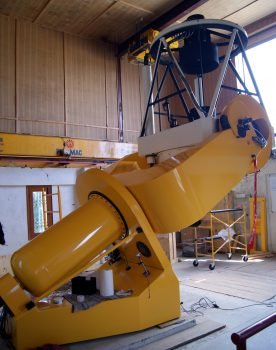


Teleskop Optik Cepat Devasthal (DFOT) dengan diameter 1.3 m merupakan fasilitas modern yang diinstal di Devasthal, Nainital, dioperasikan oleh Aryabhatta Research Institute of Observational Sciences (ARIES), di bawah Departemen Ilmu Pengetahuan dan Teknologi (DST) Pemerintah India. Diresmikan pada 19 Desember 2010, teleskop ini menggunakan desain Ritchey-Chretien Cassegrain dan memiliki rasio fokus terhadap diameter sebesar empat, menjadikannya sistem yang sangat cepat dengan lapangan pandang hingga 66 arcmin. Dilengkapi dengan teknologi modern, teleskop ini cocok untuk berbagai program ilmiah, termasuk penelitian objek redup dan pemetaan benda langit.

DFOT diakui sebagai fasilitas yang luar biasa untuk penelitian astronomi, meskipun aperture-nya relatif kecil di tingkat internasional. Terletak di antara Australia dan Kepulauan Canary, situs Devasthal memberikan kondisi gelap dan pengamatan sangat tajam, ideal untuk mengamati peristiwa transien dan penelitian tindak lanjut dari sumber yang ditemukan oleh teleskop luar angkasa India ASTROSAT dan GMRT Radio telescope. Teleskop ini juga telah terbukti efektif dalam mendeteksi dan menganalisis planet ekstrasolar, serta memenuhi kebutuhan observasional utama institut, menggantikan teleskop lama 104-cm di Manora Peak, Nainital.

DFOT tidak hanya didedikasikan untuk program ilmiah di ARIES, tetapi juga terbuka bagi peneliti nasional dan internasional untuk melakukan penelitian bersama dengan ilmuwan ARIES. Dengan keakuratan tinggi dan teknologi canggih, teleskop ini tidak hanya mencapai stabilitas fotometri yang tinggi untuk bintang-bintang terang, tetapi juga memberikan kontribusi berharga dalam pemantauan transien, variasi bintang, dan studi galaksi aktif, memperkaya pemahaman kita tentang alam semesta.

## Referensi

Paper Researchgate :
[The new 130-cm Optical telescope at Devasthal, Nainital](https://www.researchgate.net/publication/258489390_The_new_130-cm_Optical_telescope_at_Devasthal_Nainital)


# Program Machine Learning


## Library


### Import Library


In [1]:
import os
import keras
import cv2
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers as tfl, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

### Penjelasan Library


1. **os**: Library ini menyediakan fungsi-fungsi untuk berinteraksi dengan sistem operasi, seperti membuat direktori, mengakses variabel lingkungan, dan lainnya.

2. **keras**: Keras adalah library tingkat tinggi untuk membangun dan melatih model neural network. Pada kode ini, digunakan untuk membuat dan melatih model neural network untuk tugas tertentu.

3. **cv2 (OpenCV)**: OpenCV adalah library pengolahan citra dan komputer vision. Pada kode ini, digunakan untuk membaca dan memanipulasi citra.

4. **sys**: Library ini menyediakan akses ke beberapa variabel sistem dan fungsi-fungsi terkait sistem, seperti `sys.argv` untuk membaca argumen baris perintah.

5. **pandas (pd)**: Pandas adalah library untuk manipulasi dan analisis data. Pada kode ini, mungkin digunakan untuk membaca dan memanipulasi data dalam format DataFrame.

6. **numpy (np)**: NumPy adalah library untuk komputasi numerik dengan Python. Pada kode ini, digunakan untuk operasi-operasi numerik, terutama untuk bekerja dengan array dan matriks.

7. **matplotlib.pyplot as plt**: Matplotlib adalah library untuk membuat visualisasi dalam bentuk grafik dan plot. Pada kode ini, digunakan untuk membuat grafik, seperti plot hasil pelatihan model.

8. **tensorflow (tf)**: TensorFlow adalah library open-source untuk pembelajaran mesin dan deep learning. Pada kode ini, digunakan untuk membangun dan melatih model neural network.

9. **tensorflow.keras.utils.image_dataset_from_directory**: Fungsi ini berasal dari TensorFlow dan digunakan untuk membuat dataset dari direktori gambar, yang sangat berguna dalam pelatihan model pada tugas pengenalan gambar.

10. **tensorflow.keras.layers (tfl)**: Modul ini menyediakan berbagai jenis lapisan (layers) yang dapat digunakan untuk membangun model neural network, seperti lapisan Dense, Conv2D, dan lainnya.

11. **tensorflow.keras.optimizers**: Modul ini menyediakan berbagai optimizers yang dapat digunakan untuk mengoptimalkan model selama proses pelatihan.

12. **sklearn.model_selection.train_test_split**: Fungsi ini berasal dari scikit-learn dan digunakan untuk membagi dataset menjadi dua bagian: satu untuk pelatihan dan satu untuk pengujian (train-test split).

13. **tensorflow.keras.preprocessing.image**: Modul ini menyediakan utilitas untuk memproses dan mengelola data gambar, seperti augmentasi gambar dan pra-pemrosesan gambar lainnya.

14. **tensorflow.keras.utils.to_categorical**: Fungsi ini digunakan untuk mengonversi label kelas menjadi representasi one-hot encoding, yang umumnya digunakan dalam tugas klasifikasi.


Mount Google Drive
Menghubungkan Akses Google Drive dengan Google Colab


In [2]:
'''
from google.colab import drive

drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\n\ndrive.mount('/content/drive')\n"

Cek Folder Saat ini dan folder


In [3]:
import os

current_directory = os.getcwd()
print("Folder saat ini:", current_directory)

Folder saat ini: c:\Users\fedba\Downloads\UTS_Machine_Learning


In [4]:
dataset_path = r"/content/drive/MyDrive/UTS_Machine_Learning/Dataset"
dataset_path = r"C:\Users\fedba\Downloads\UTS_Machine_Learning\Dataset"

In [5]:
import os


def show_folder_contents(path):
    """Displays the contents of a directory, including the number of files and subfolders in each subfolder.

    Args:
      path: The path to the directory.
    """

    num_files = 0
    num_subfolders = 0
    total_files = 0
    num_files_in_subfolder, total_files_in_subfolder = 0, 0
    for entry in os.listdir(path):
        if os.path.isfile(os.path.join(path, entry)):
            num_files += 1
            total_files += 1
        elif os.path.isdir(os.path.join(path, entry)):
            num_subfolders += 1
            print(f'Subfolder: {entry}')

            # Recursively call the function to display the contents of the subfolder.
            # Check if the function is returning a valid value. If not, ignore it.
            try:
                num_files_in_subfolder, total_files_in_subfolder = show_folder_contents(
                    os.path.join(path, entry))

                if num_files_in_subfolder is not None and total_files_in_subfolder is not None:
                    print(
                        f'Number of files in subfolder: {num_files_in_subfolder}')
                    print(
                        f'Total number of files in subfolder: {total_files_in_subfolder}')

                    # Add the number of files in the subfolder to the total number of files.
                    total_files += total_files_in_subfolder
            except TypeError as e:
                # print("TypeError : ", e)
                pass
    if total_files != 0:
        print(f'Total number of files in folder: {total_files}')
    # return num_files_in_subfolder, total_files_in_subfolder


show_folder_contents(dataset_path)

Subfolder: galaxy
Total number of files in folder: 942
Subfolder: star
Total number of files in folder: 3044


In [6]:
import matplotlib.pyplot as plt
import random


def show_random_files_subplot(folder_path, num_files=3):
    # Dapatkan daftar file di folder
    files = os.listdir(folder_path)

    # Pilih 10 file secara acak
    random_files = random.sample(files, num_files)

    # Hitung jumlah baris dan kolom subplot
    num_rows = 1
    num_cols = num_files

    # Buat subplot dengan jumlah baris dan kolom yang sesuai
    fig, axes = plt.subplots(num_rows, num_cols)

    # Ubah ukuran plot menjadi 10x10
    fig.set_size_inches(10, 10)

    # Tampilkan gambar dari file-file tersebut

    for i, file in enumerate(random_files):
        image = plt.imread(os.path.join(folder_path, file))
        image = np.array(image)

        # Check if the image is a valid NumPy array
        if not isinstance(image, np.ndarray):
            print("Error reading image:", file)
            continue

        col_index = i % num_cols
        subplot = plt.subplot(1, num_cols, i + 1)
        try:
            plt.imshow(image)
        except TypeError as e:
            print("TypeError : ", e)
            pass
        # Tambah label gambar
        axes[col_index].set_title(
            "Galaxy" if folder_path == galaxy_folder else "Star"
        )
    # Atur tight_layout
    fig.tight_layout()

    return fig

In [7]:
galaxy_folder = r"/content/drive/MyDrive/UTS_Machine_Learning/Dataset/galaxy"
star_folder = r"/content/drive/MyDrive/UTS_Machine_Learning/Dataset/star"
test_dataset_folder = r"/content/drive/MyDrive/UTS_Machine_Learning/test_dataset"
galaxy_folder = r"C:\Users\fedba\Downloads\UTS_Machine_Learning\Dataset\galaxy"
star_folder = r"C:\Users\fedba\Downloads\UTS_Machine_Learning\Dataset\star"
test_dataset_folder = r"C:\Users\fedba\Downloads\UTS_Machine_Learning\test_dataset"

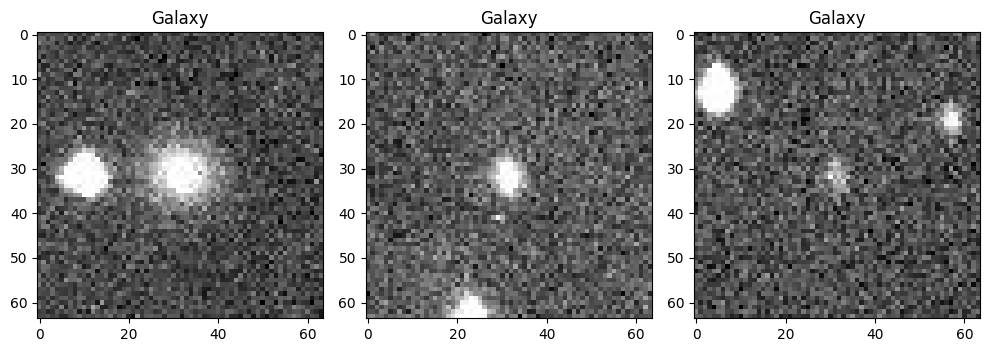

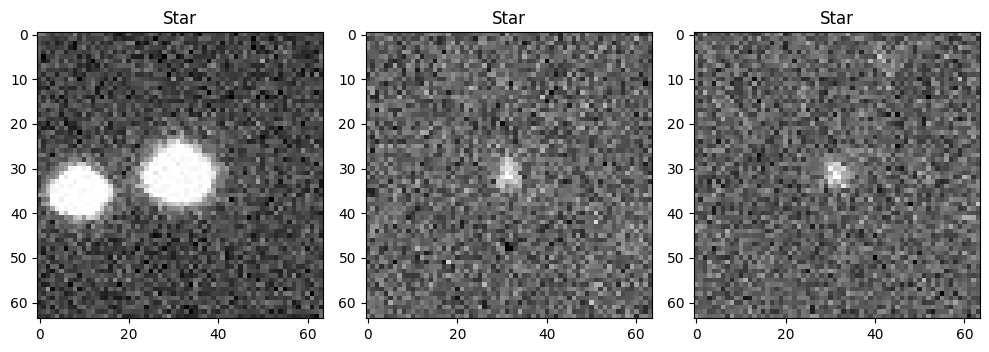

In [8]:
# Panggil fungsi show_random_files_subplot() untuk kedua folder
fig_galaxy = show_random_files_subplot(galaxy_folder)
fig_star = show_random_files_subplot(star_folder)
# Satukan kedua plot menjadi satu plot
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
try:
    plt.title("Galaxy")
    plt.imshow(fig_galaxy)
    plt.title("Star")
    plt.imshow(fig_star)
except:
    pass

# Looping untuk memeriksa semua subplot
for axes in fig.axes:
    # Cek apakah subplot berisi gambar
    images = axes.get_images()
    plt.close(fig)
# Tampilkan gambar
plt.show()

Membuat variabel untuk menyimpan lokasi path dasar agar lebih mudah dalam penggunaan berikutnya ketika mengakses file


In [9]:
base_path = '/content/drive/MyDrive/UTS_Machine_Learning/Dataset'

Fungsi Untuk Mengambil Dataset Random Untuk Diklasifikasikan


In [10]:
import os
import shutil
import random

output_folder = "test_dataset"
source_folders = ["galaxy", "star"]
num_files = 5


def copy_random_files_to_drive(output_folder, source_folders, num_files):
    # Path ke folder tujuan di Google Drive
    drive_output_folder = os.path.join(base_path, output_folder)

    # Buat folder tujuan di Google Drive jika belum ada
    if not os.path.exists(drive_output_folder):
        os.makedirs(drive_output_folder)

    num = 0
    for source_folder in source_folders:
        # Daftar semua file dalam folder sumber

        pathfolder = os.path.join(base_path, source_folder)
        print(pathfolder)

        source_files = os.listdir(pathfolder)
        print(source_files)
        folder_path = pathfolder
        # Hitung jumlah file dalam folder
        file_count = len([f for f in os.listdir(folder_path)
                         if os.path.isfile(os.path.join(folder_path, f))])

        print(f"Jumlah file dalam folder: {file_count}")

        # Pilih 50 file secara acak dari folder sumber

        random_files = random.choices(source_files, k=num_files)
        print("random_files", random_files)
        # Salin file yang dipilih ke folder tujuan di Google Drive
        for random_file in random_files:
            source_path = os.path.join(folder_path, random_file)
            print("source_path", source_path)
            drive_output_path = os.path.join(drive_output_folder, random_file)
            try:
                shutil.move(source_path, drive_output_path)
                num = num + 1
            except:
                print("Error ")
                pass

    print(
        f"Berhasil menambahkan {num_files * len(source_folders)} file ke folder {output_folder} di Google Drive.")
    print(f"num : {num}")


# copy_random_files_to_drive(output_folder, source_folders, num_files)

In [11]:
# Hitung jumlah file dalam folder
file_count = len([f for f in os.listdir(test_dataset_folder)
                 if os.path.isfile(os.path.join(test_dataset_folder, f))])
print(f"Jumlah file dalam folder Random_dataset: {file_count}")

Jumlah file dalam folder Random_dataset: 17


## Ubah dataset menjadi dataframe


In [12]:
import glob
galaxy_path = glob.glob(galaxy_folder+'/*')
star_path = glob.glob(star_folder+'/*')

In [13]:
data = []
labels = []
names = []
classes = []

In [14]:
for x in galaxy_path:
    # Ambil string setelah karakter pemisah terakhir
    last_slash_index = x.rfind("/")
    filename = x[last_slash_index + 1:]
    names.append(filename)

    image = cv2.imread(x, 1)
    image = np.array(image)
    data.append(image)
    labels.append(0)
    classes.append("Galaxy")

In [15]:
for x in star_path:
    # Ambil string setelah karakter pemisah terakhir
    last_slash_index = x.rfind("/")
    filename = x[last_slash_index + 1:]
    names.append(filename)

    image = cv2.imread(x, 1)
    image = np.array(image)
    data.append(image)
    labels.append(1)
    classes.append("Star")

In [16]:
data, labels, names, classes = np.array(data), np.array(
    labels), np.array(names), np.array(classes)
dataset = pd.DataFrame(list(zip(names, data, labels, classes)), columns=[
                       'Images', 'Data Array', 'labels', 'class'])
dataset

Images  \
0     C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
1     C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
2     C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
3     C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
4     C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
...                                                 ...   
3981  C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
3982  C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
3983  C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
3984  C:\Users\fedba\Downloads\UTS_Machine_Learning\...   
3985  C:\Users\fedba\Downloads\UTS_Machine_Learning\...   

                                             Data Array  labels   class  
0     [[[66, 66, 66], [105, 105, 105], [128, 128, 12...       0  Galaxy  
1     [[[172, 172, 172], [140, 140, 140], [137, 137,...       0  Galaxy  
2     [[[114, 114, 114], [90, 90, 90], [159, 159, 15...       0  Galaxy  
3     [[[68, 68, 68], [19, 19, 19], [104, 104, 104],...       0  Galaxy  
4     [[[43, 43, 43], [97, 97, 97], [30, 30, 30], [6...       0  Galaxy  
...                                                 ...     ...     ...  
3981  [[[99, 99, 99], [98, 98, 98], [51, 51, 51], [5...       1    Star  
3982  [[[95, 95, 95], [116, 116, 116], [123, 123, 12...       1    Star  
3983  [[[82, 82, 82], [82, 82, 82], [112, 112, 112],...       1    Star  
3984  [[[93, 93, 93], [103, 103, 103], [80, 80, 80],...       1    Star  
3985  [[[128, 128, 128], [93, 93, 93], [20, 20, 20],...       1    Star  

[3986 rows x 4 columns]

## Split Data


In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=dataset['labels'].values)

print("x_train.shape : ", x_train.shape, "\t y_train.shape : ", y_train.shape)
print("x_test.shape : ", x_test.shape, "\t y_test.shape : ", y_test.shape)

nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples, nx*ny*nrgb))

nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples, nx*ny*nrgb))

print("x_train2.shape : ", x_train2.shape)
print("x_test2.shape : ", x_test2.shape)

x_train.shape :  (3188, 64, 64, 3) 	 y_train.shape :  (3188,)
x_test.shape :  (798, 64, 64, 3) 	 y_test.shape :  (798,)
x_train2.shape :  (3188, 12288)
x_test2.shape :  (798, 12288)


## Membuat Model Machine Learning


## Random Forest


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train2, y_train)
y_pred = rf.predict(x_test2)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Classification Report


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test))
confusion_matrix(y_pred, y_test)

              precision    recall  f1-score   support

           0       0.13      0.83      0.23        30
           1       0.99      0.79      0.88       768

    accuracy                           0.79       798
   macro avg       0.56      0.81      0.55       798
weighted avg       0.96      0.79      0.85       798



array([[ 25,   5],
       [164, 604]], dtype=int64)

## KNN


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train2, y_train)
y_pred_knn = knn.predict(x_test2)
print(y_pred_knn)
accuracy_score(y_pred_knn, y_test)
print(classification_report(y_pred_knn, y_test))
confusion_matrix(y_pred_knn, y_test)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

array([[ 25,  13],
       [164, 596]], dtype=int64)

# Prediksi Langsung dengan ANN


In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(64, 64, 32),
                    activation='relu', solver='adam', learning_rate_init=0.0001)
clf.fit(x_train2, y_train)

C:\Users\fedba\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.0001)

17
grb0422a_01_68_1020_6.jpg 	 prediction : Star


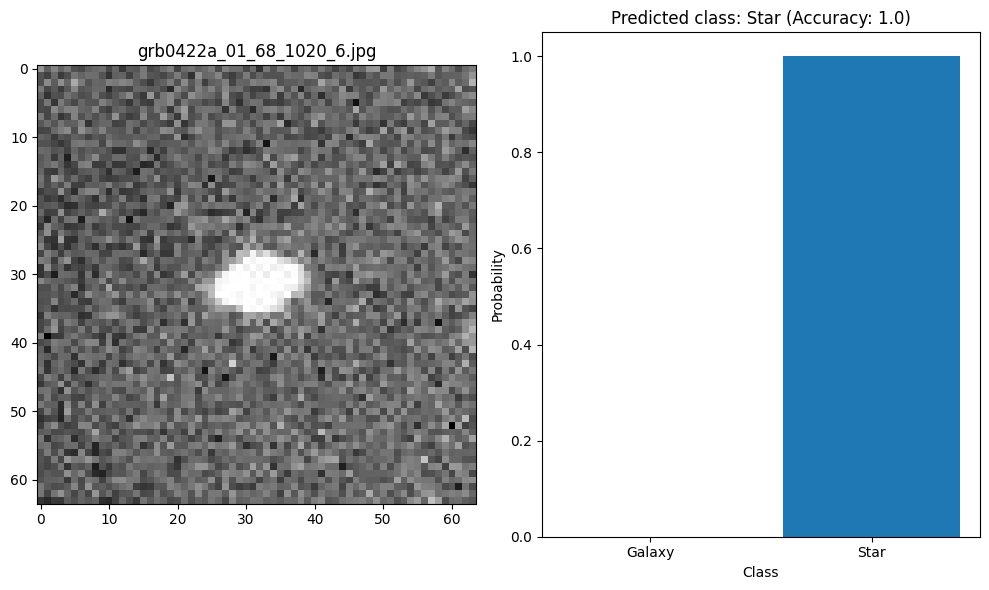

IC745_H01_412_1000_3.jpg 	 prediction : Star


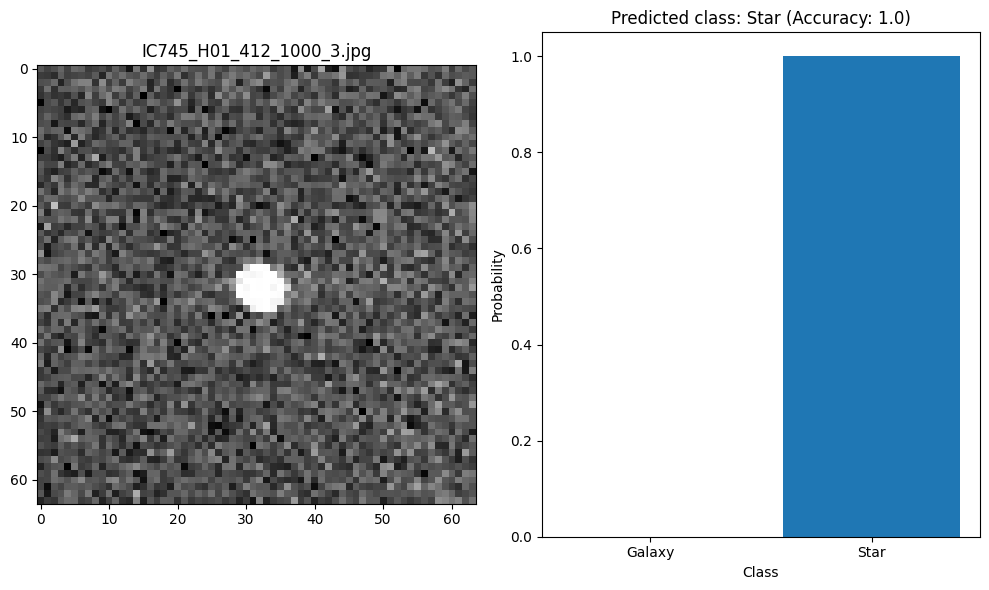

IC745_H01_683_1551_3.jpg 	 prediction : Star


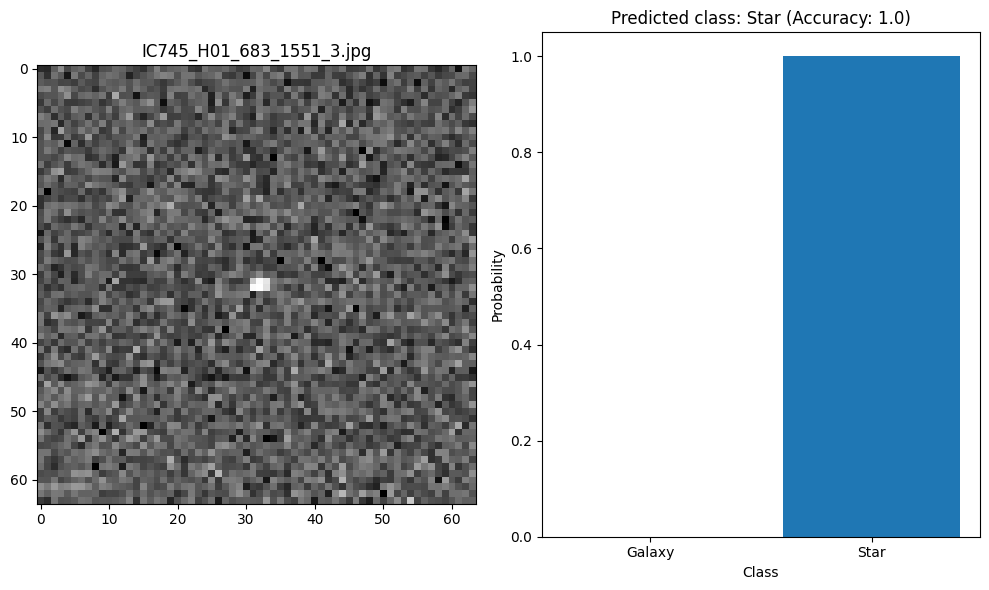

J125219p264053_001_010_1262_1344_6.jpg 	 prediction : Star


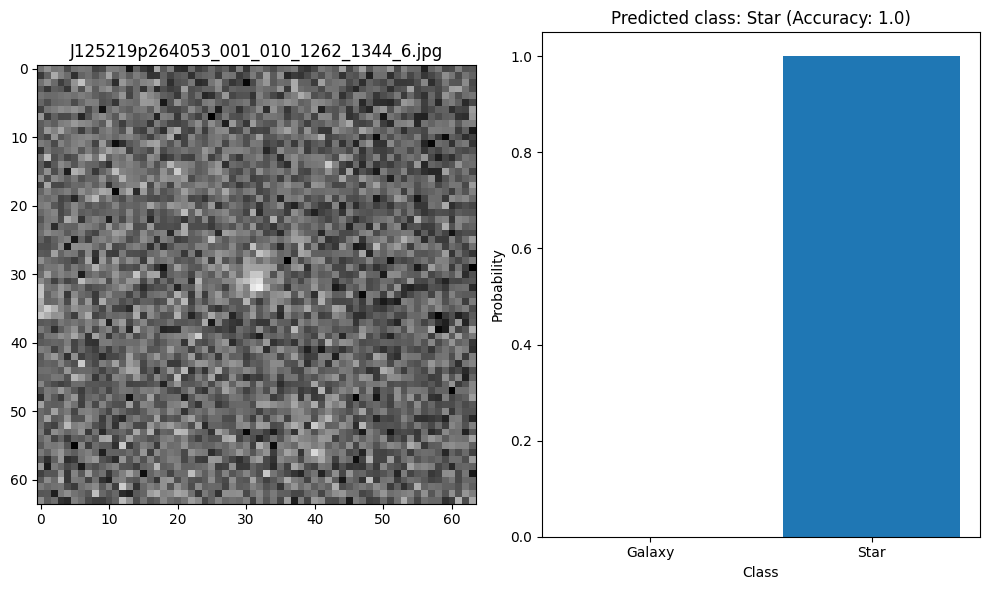

J125219p264053_001_010_1546_524_3.jpg 	 prediction : Star


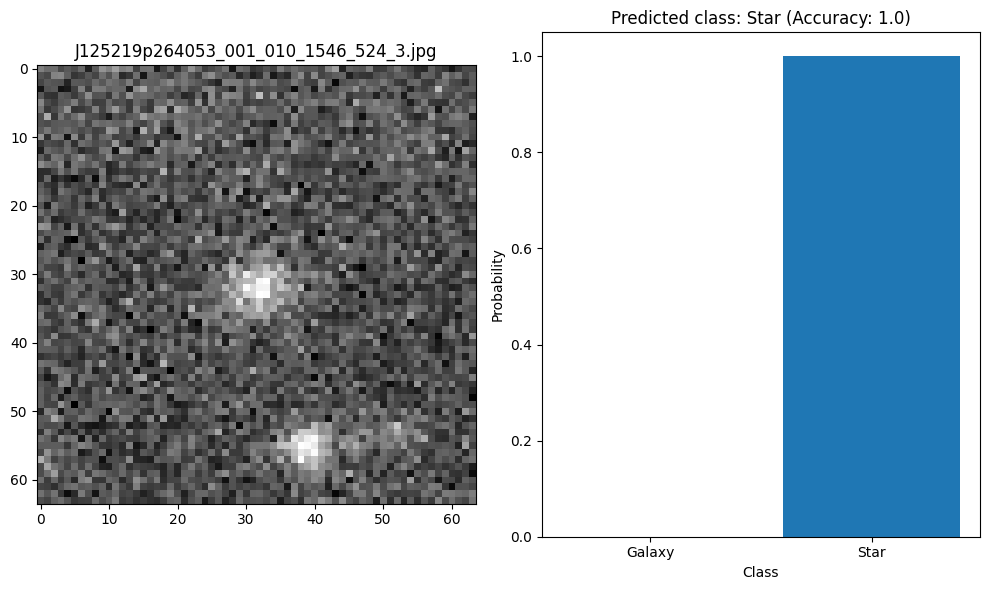

J142943p385931_001_001_159_996_3.jpg 	 prediction : Star


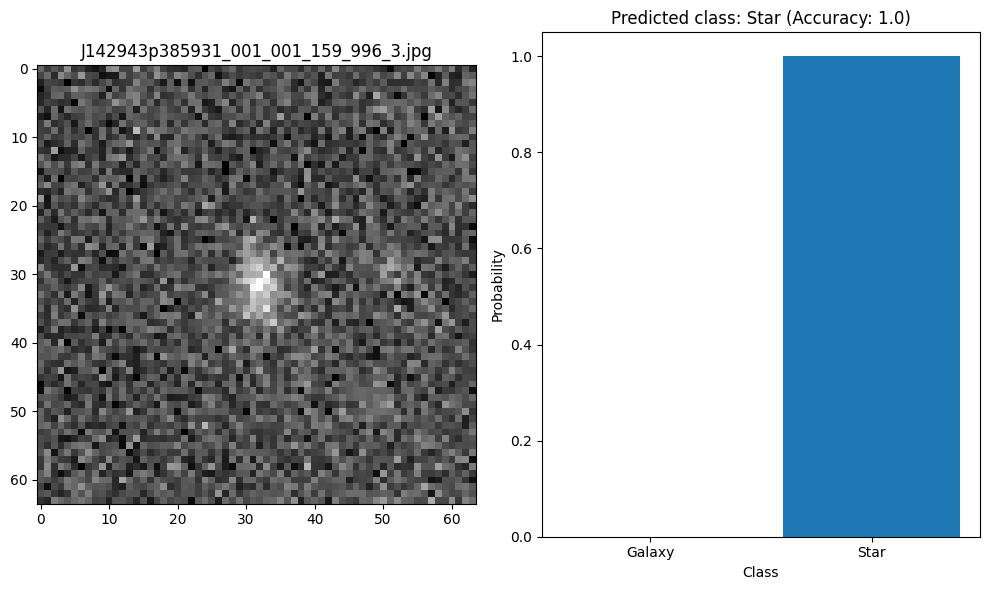

J15050326_01_1367_647_6.jpg 	 prediction : Star


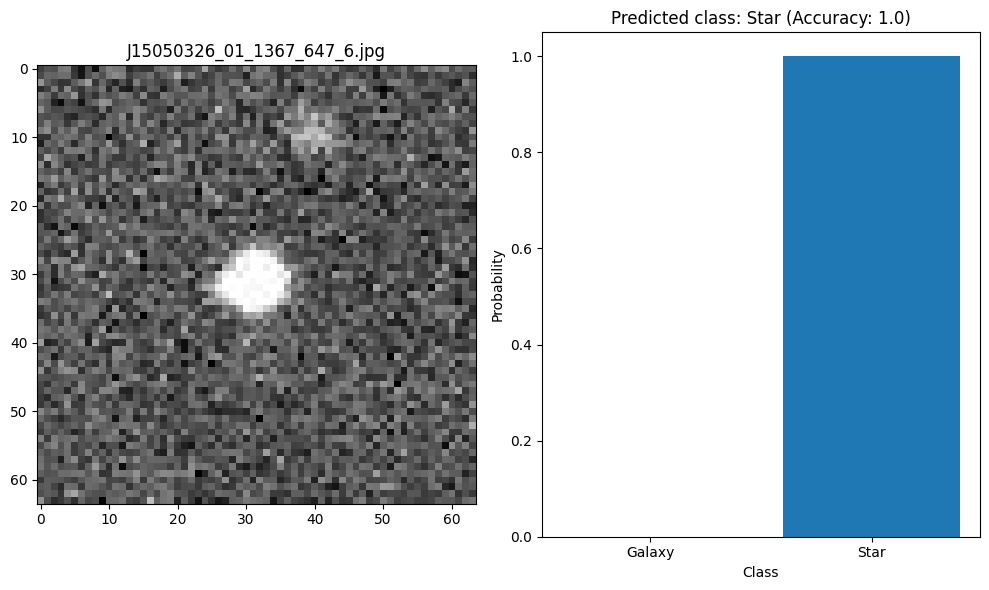

J153044p231014_001_001_1266_534_6.jpg 	 prediction : Star


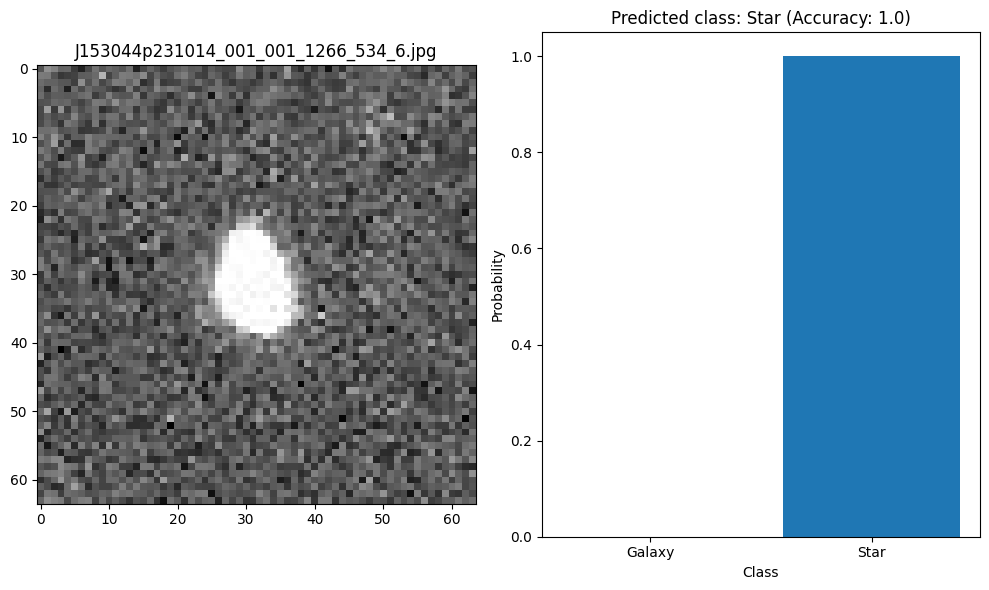

J153044p231014_001_001_625_119_3.jpg 	 prediction : Star


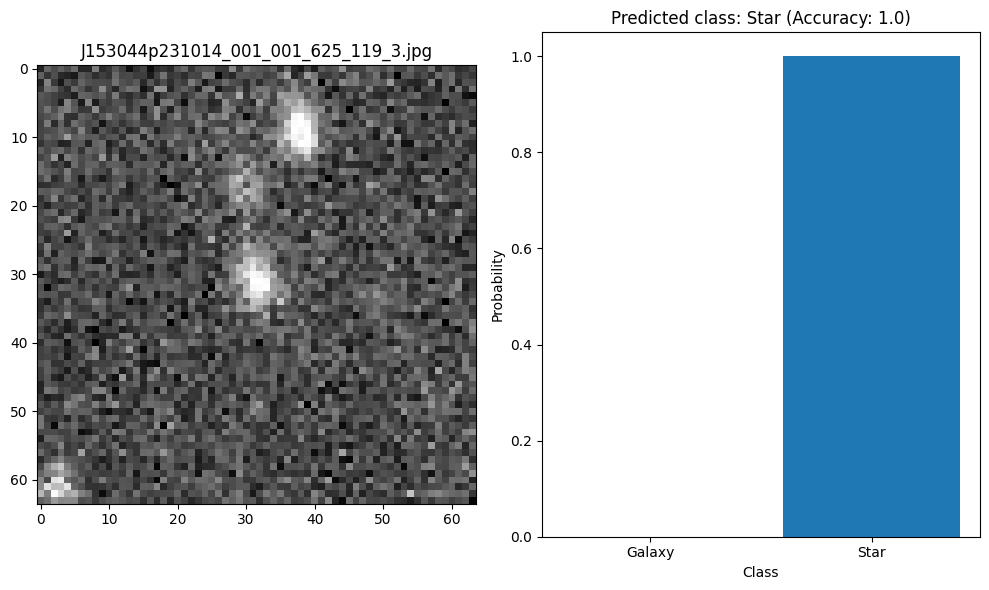

J1530p2310_r_01_92_1222_3.jpg 	 prediction : Star


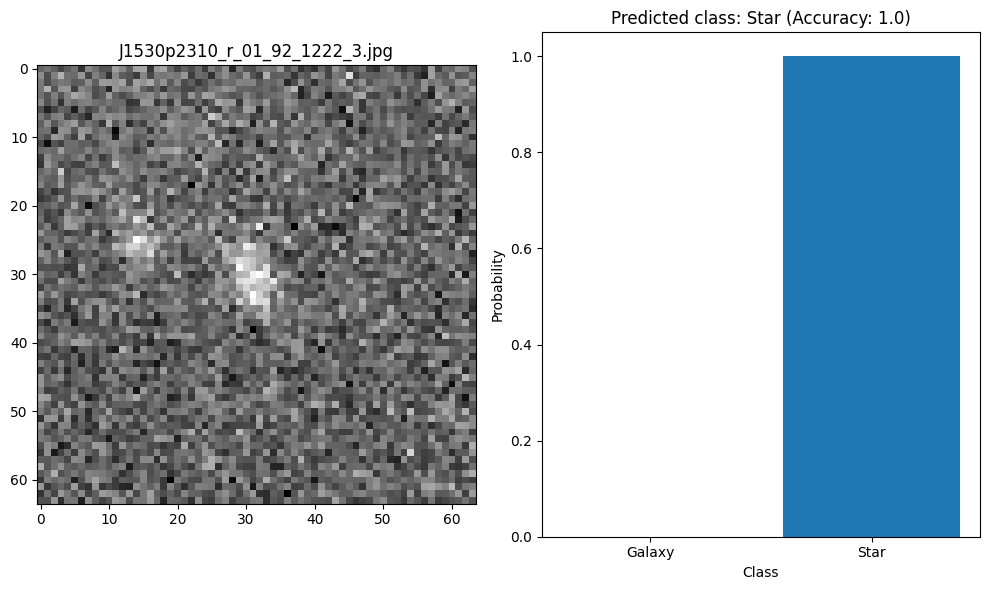

J1603p3002_001_010_676_851_3.jpg 	 prediction : Star


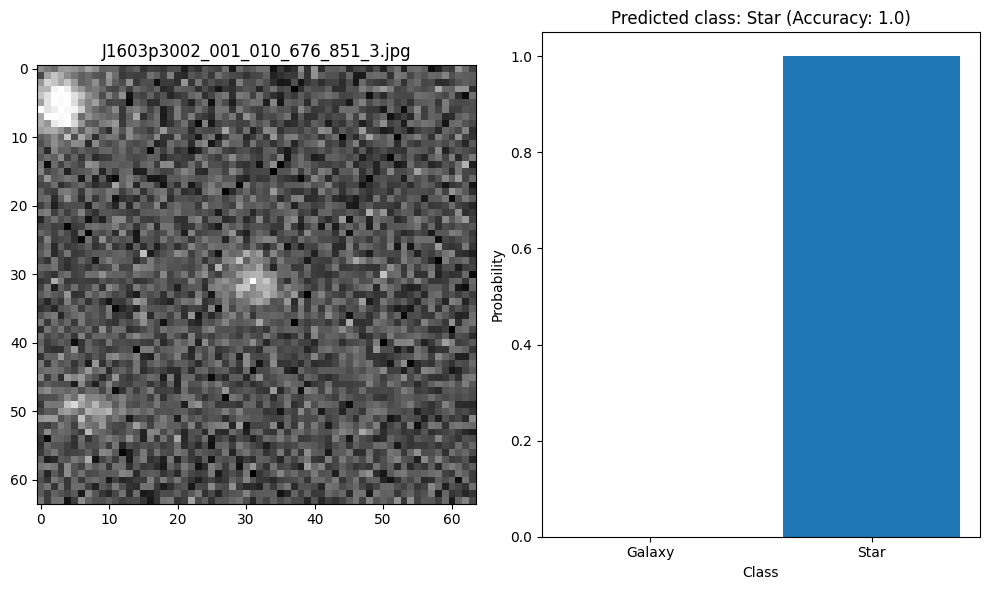

j1612p5118_r_01_1278_1612_6.jpg 	 prediction : Star


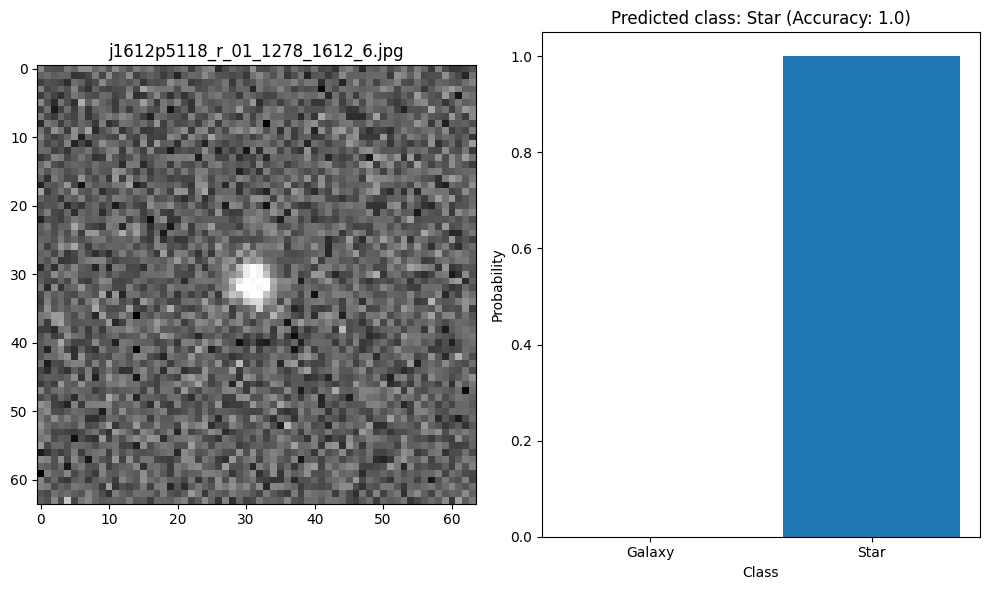

j1612p5118_r_01_1773_916_6.jpg 	 prediction : Star


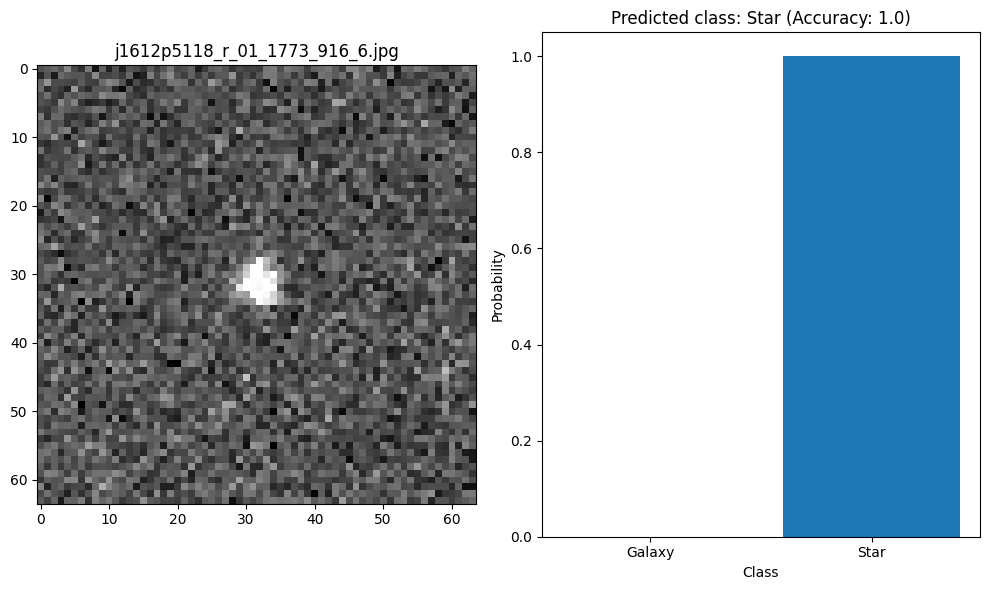

j1612p5118_r_01_951_344_3.jpg 	 prediction : Star


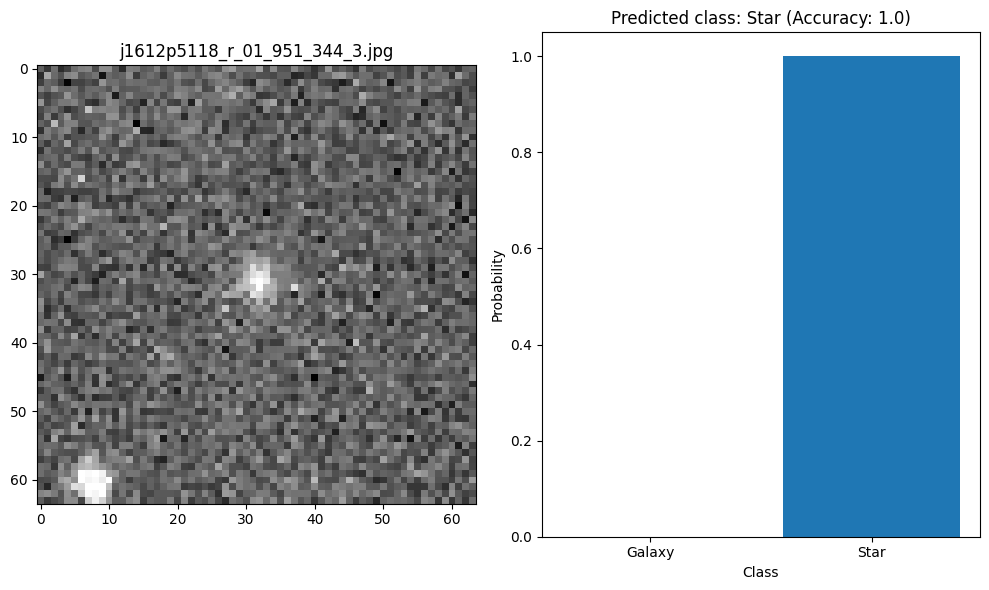

WASP-24_R01_1591_1516_6.jpg 	 prediction : Star


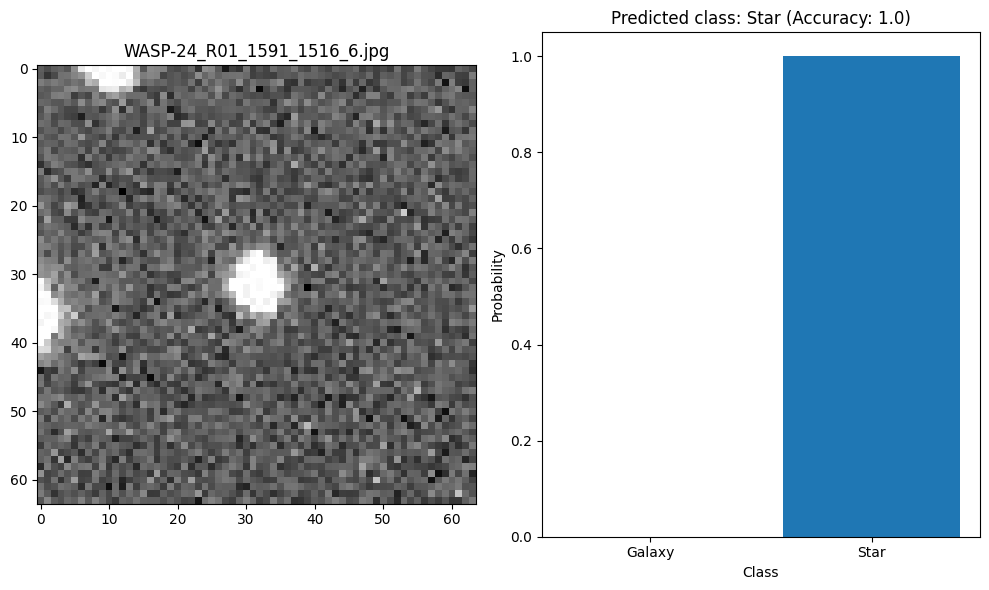

WR083_H01_827_1647_6.jpg 	 prediction : Star


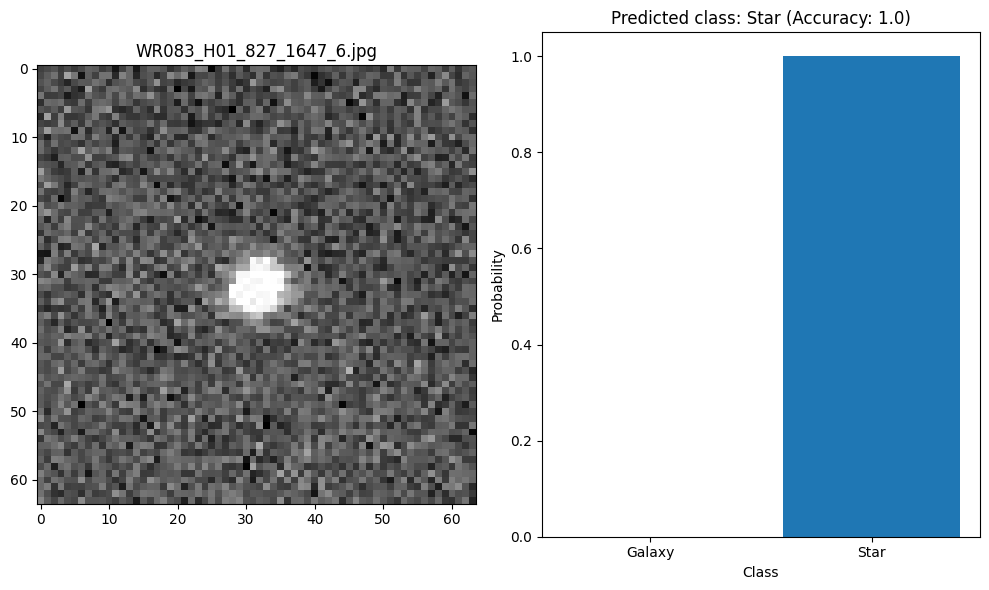

xo-1-R001_1973_389_6.jpg 	 prediction : Star


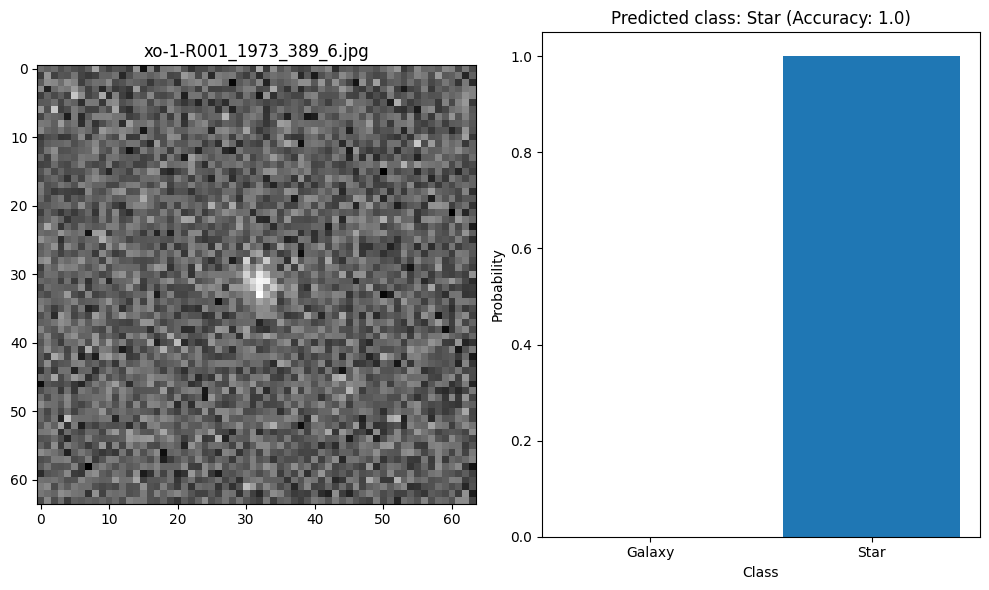

In [22]:

def predict_images(test_data_folder, model):

    # Load the test images
    test_images = os.listdir(test_data_folder)
    print(len(list(test_images)))

    for image_name in test_images:
        image_path = os.path.join(test_data_folder, image_name)
        image_array = cv2.imread(image_path, 1)
        image_array = np.array(image)
        image_array = image_array.reshape((1, nx*ny*nrgb))
        # Predict the class
        prediction = model.predict(image_array)
        predicted_class = prediction[0]
        accuracy = model.score(image_array, [predicted_class])

        # Plot the image and the predicted class
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)

        img = plt.imread(image_path)
        img = np.array(img)
        plt.imshow(img)
        plt.title(image_name)

        plt.subplot(1, 2, 2)
        categories = ["Galaxy", "Star"]
        galaxy_count = 0
        star_count = 0
        if prediction == 0:
            galaxy_count += 1
        else:
            star_count += 1

        print(image_name, f"\t prediction : {categories[predicted_class]}")

        plt.bar(categories, [galaxy_count, star_count])
        plt.xlabel('Class')
        plt.ylabel('Probability')
        plt.title('Predicted class: ' +
                  categories[predicted_class] + ' (Accuracy: ' + str(accuracy) + ')')
        plt.tight_layout()
        plt.show()


# Example usage
predict_images(
    r"C:\Users\fedba\Downloads\UTS_Machine_Learning\test_dataset", clf)

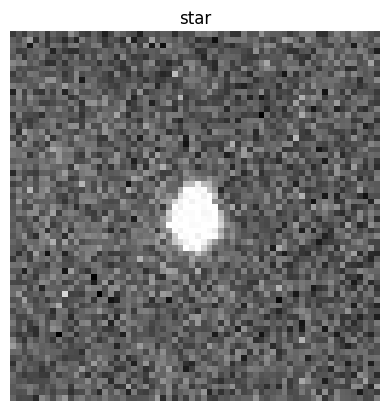

In [23]:
def show_img(x, y, index):
    plt.imshow(x[index])
    if y[index] == 0:
        plt.title('galaxy')
    else:
        plt.title('star')
    plt.axis('off')
    plt.show()


show_img(x_test, y_test, 790)

17
grb0422a_01_68_1020_6.jpg 	 prediction : Star


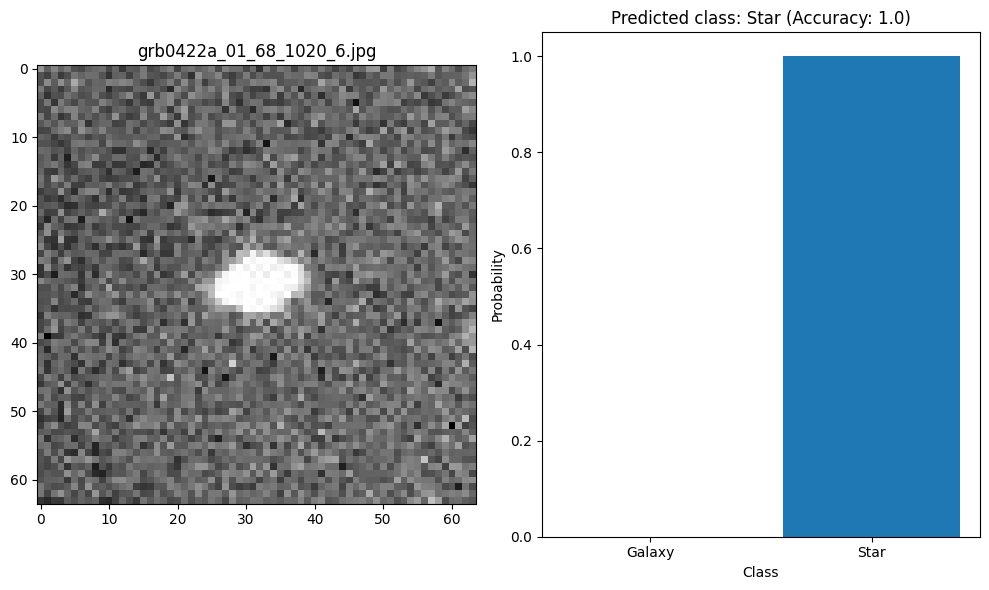

IC745_H01_412_1000_3.jpg 	 prediction : Star


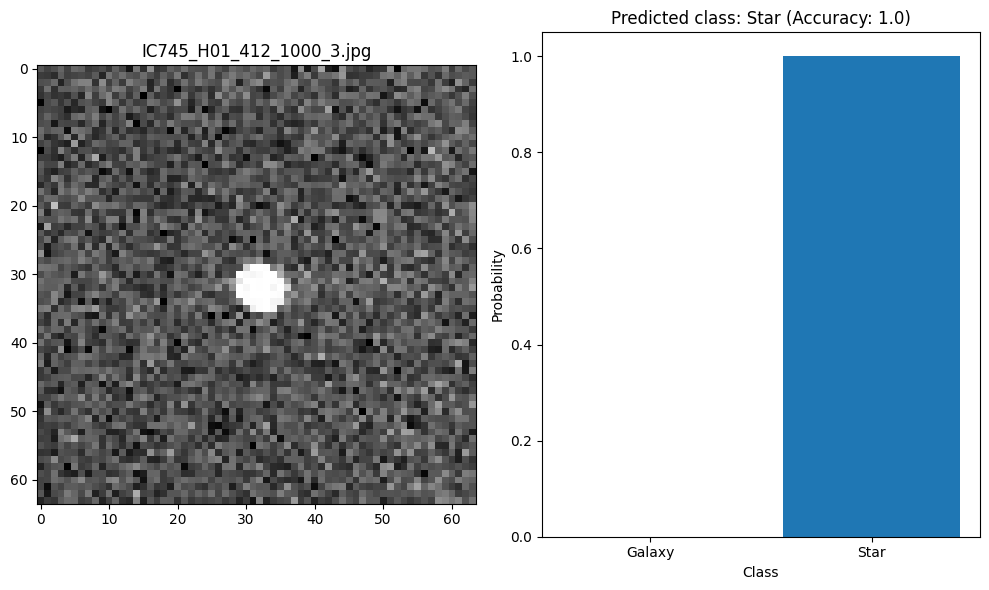

IC745_H01_683_1551_3.jpg 	 prediction : Star


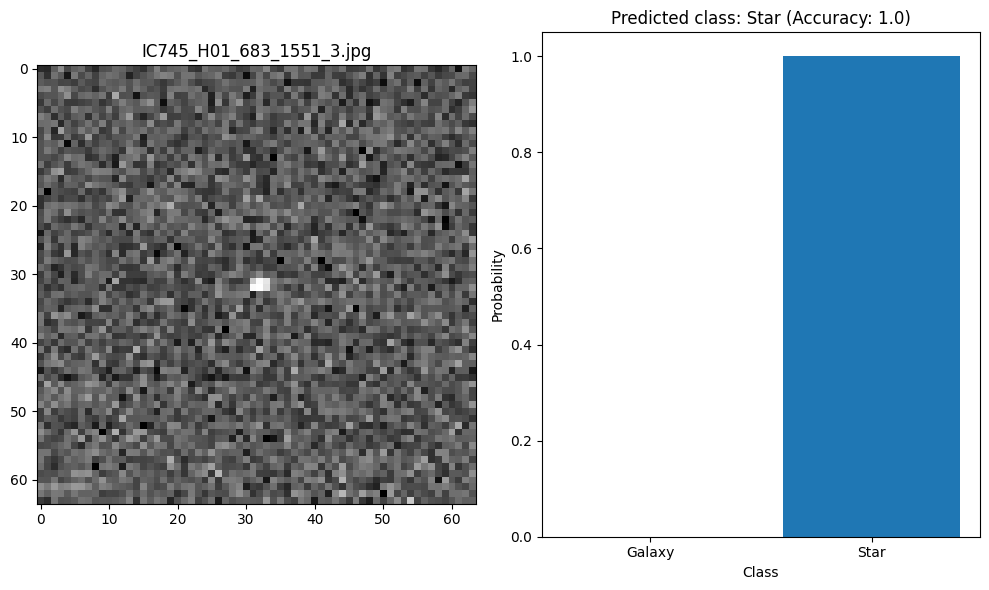

J125219p264053_001_010_1262_1344_6.jpg 	 prediction : Star


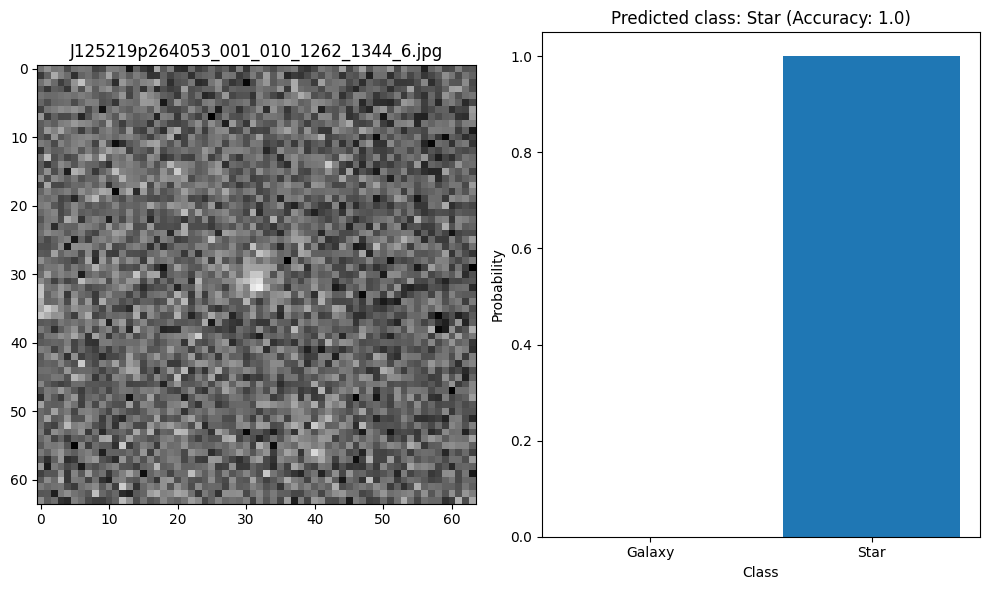

J125219p264053_001_010_1546_524_3.jpg 	 prediction : Star


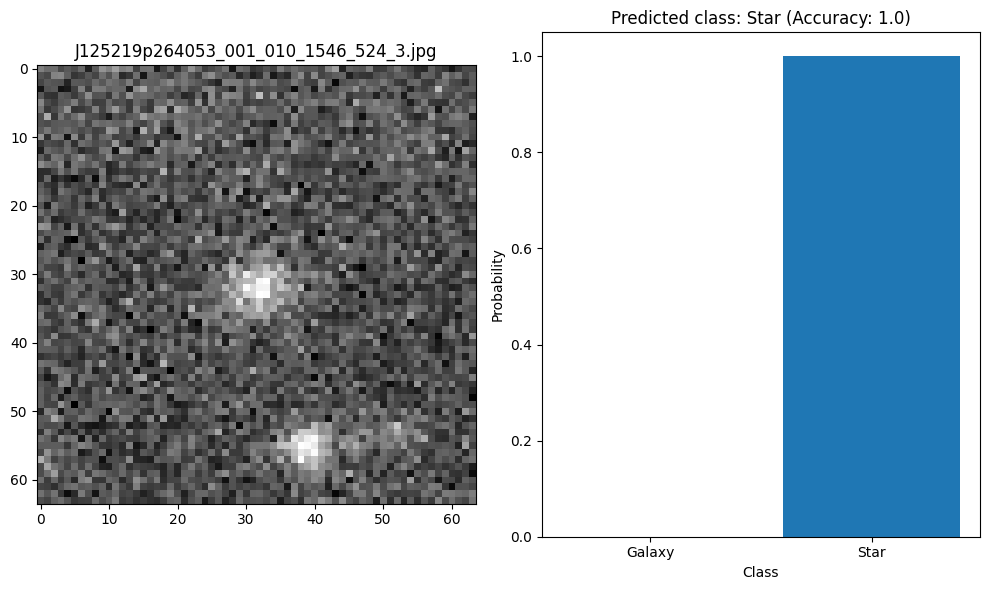

J142943p385931_001_001_159_996_3.jpg 	 prediction : Star


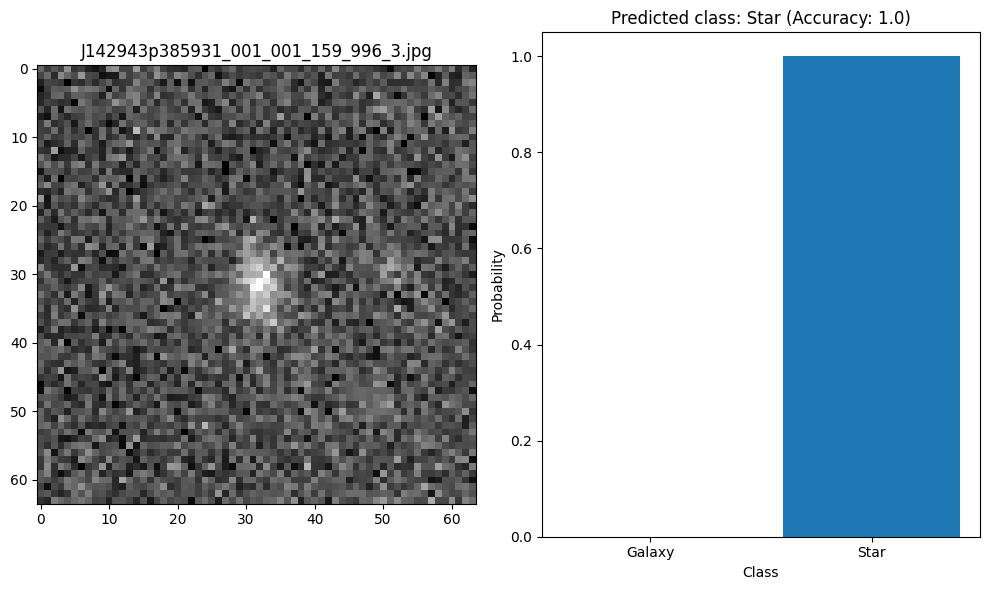

J15050326_01_1367_647_6.jpg 	 prediction : Star


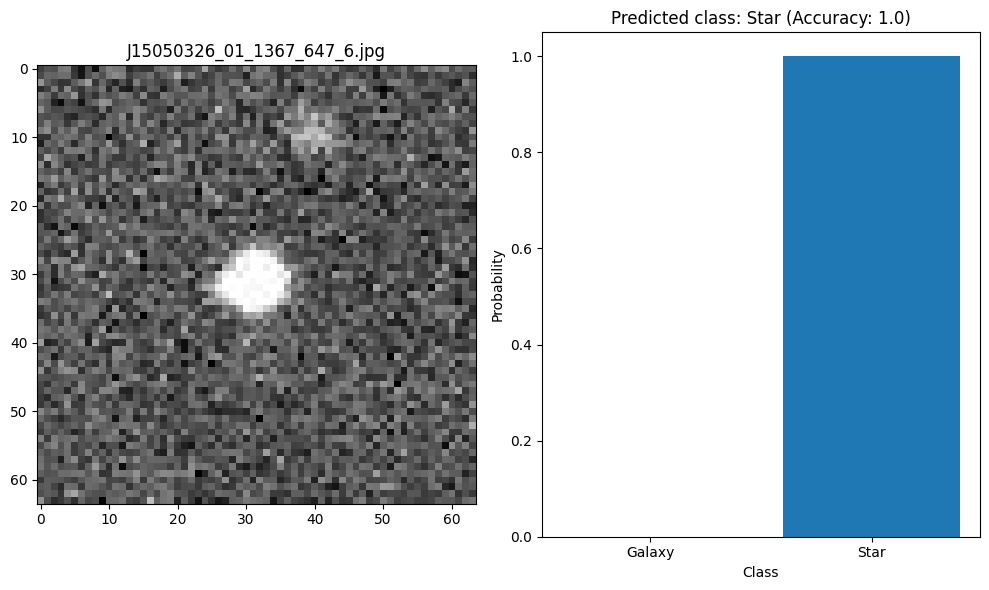

J153044p231014_001_001_1266_534_6.jpg 	 prediction : Star


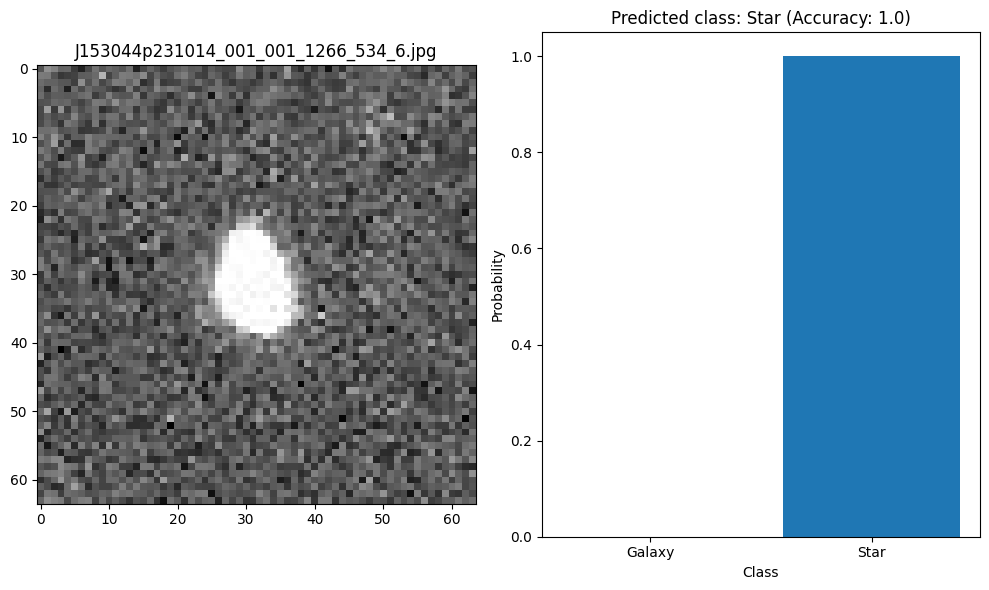

J153044p231014_001_001_625_119_3.jpg 	 prediction : Star


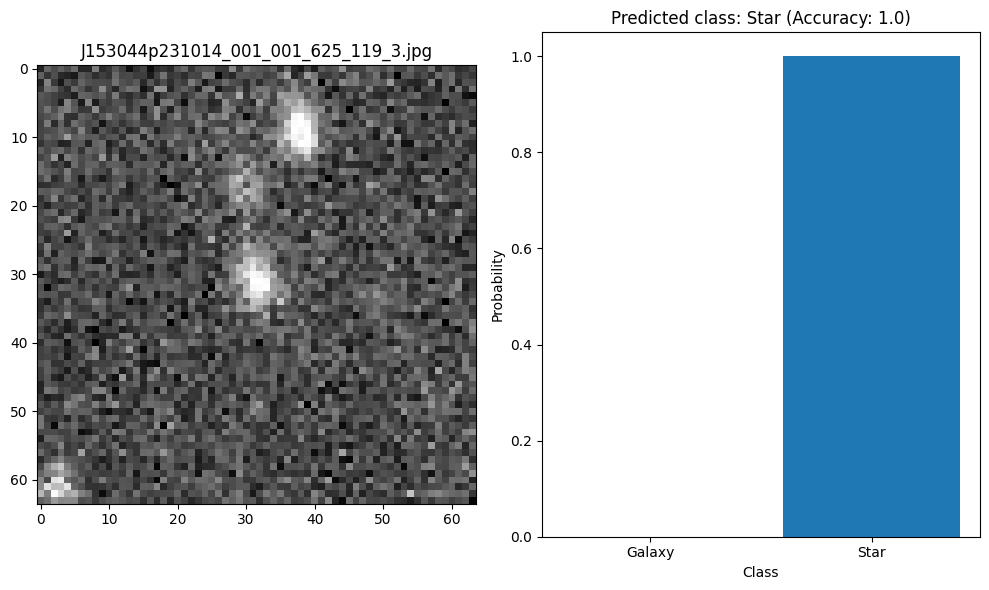

J1530p2310_r_01_92_1222_3.jpg 	 prediction : Star


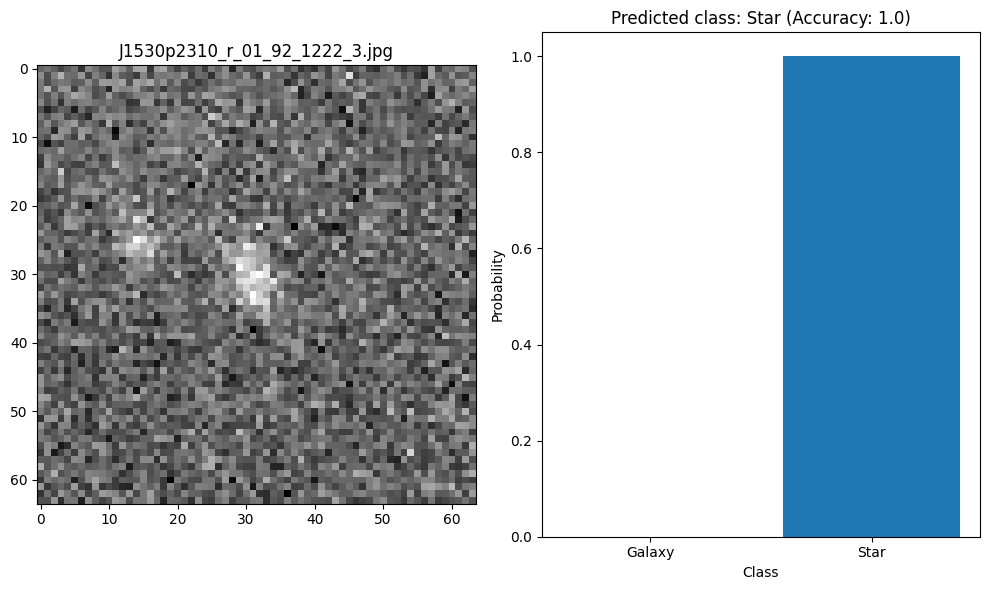

J1603p3002_001_010_676_851_3.jpg 	 prediction : Star


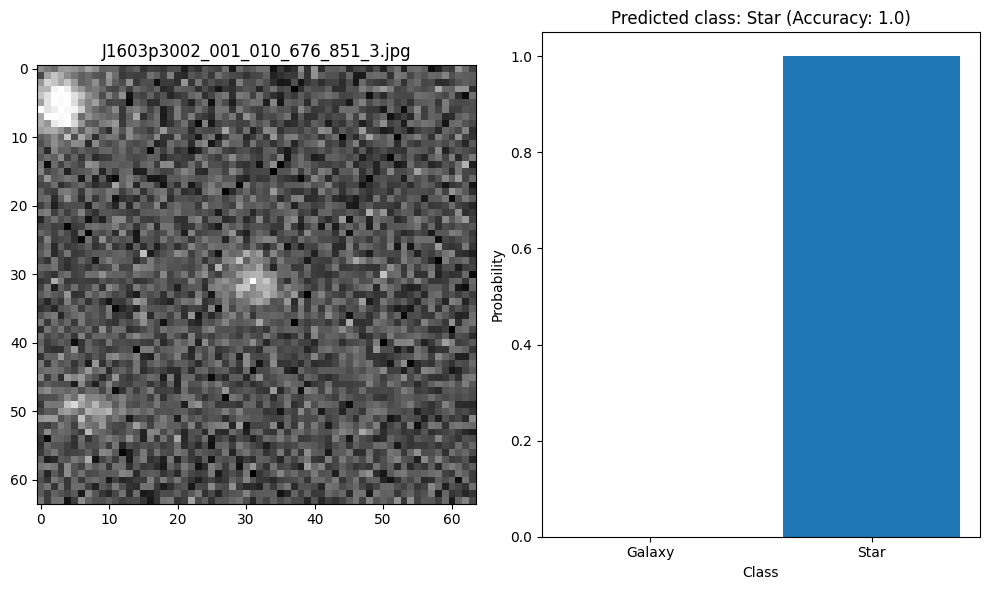

j1612p5118_r_01_1278_1612_6.jpg 	 prediction : Star


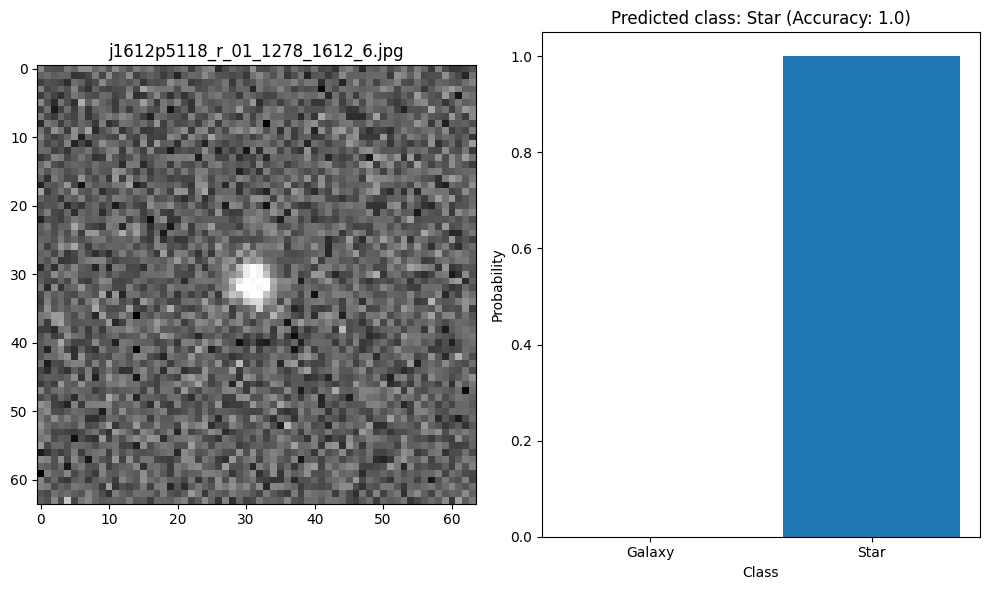

j1612p5118_r_01_1773_916_6.jpg 	 prediction : Star


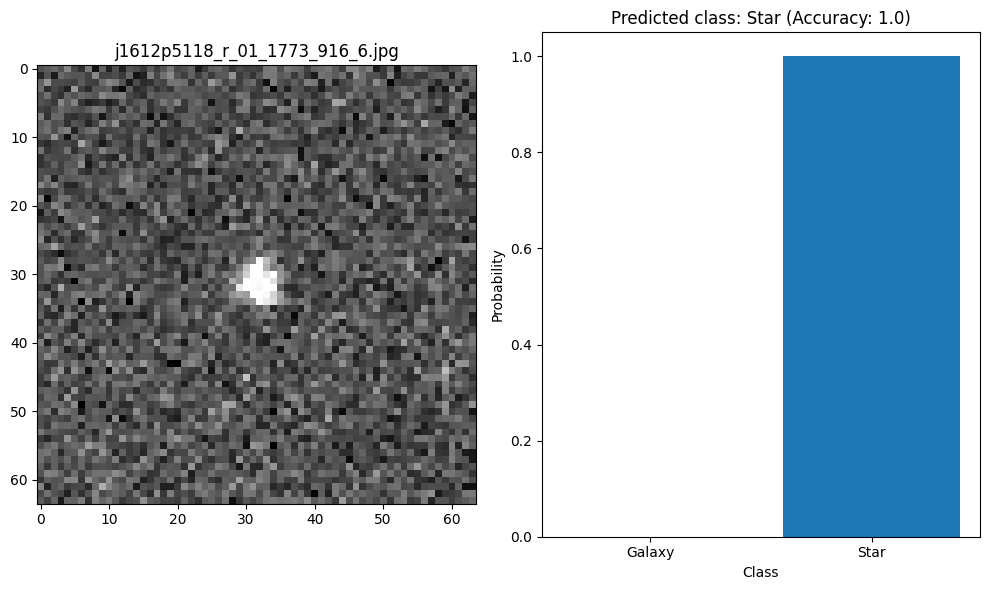

j1612p5118_r_01_951_344_3.jpg 	 prediction : Star


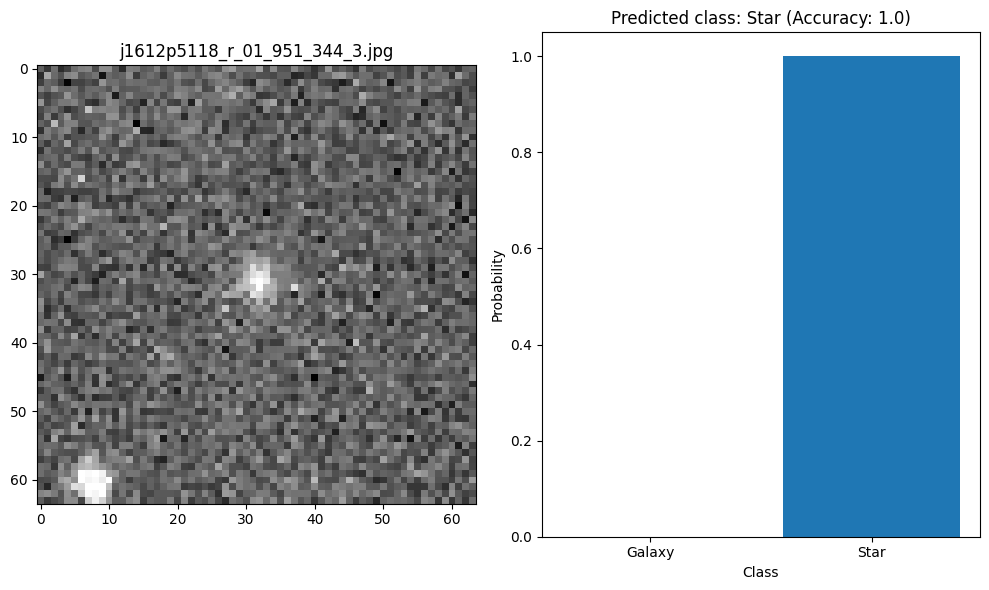

WASP-24_R01_1591_1516_6.jpg 	 prediction : Star


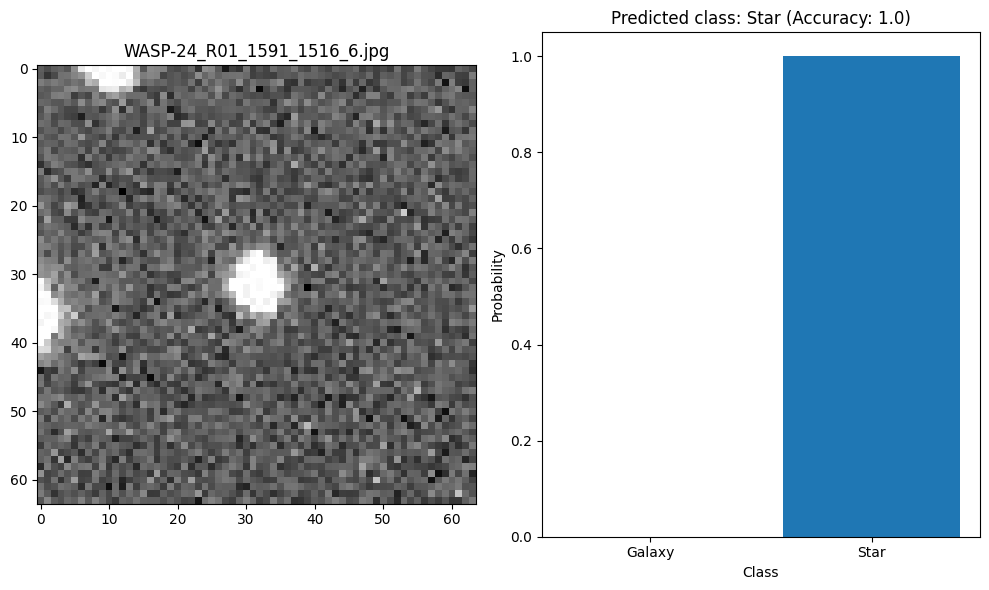

WR083_H01_827_1647_6.jpg 	 prediction : Star


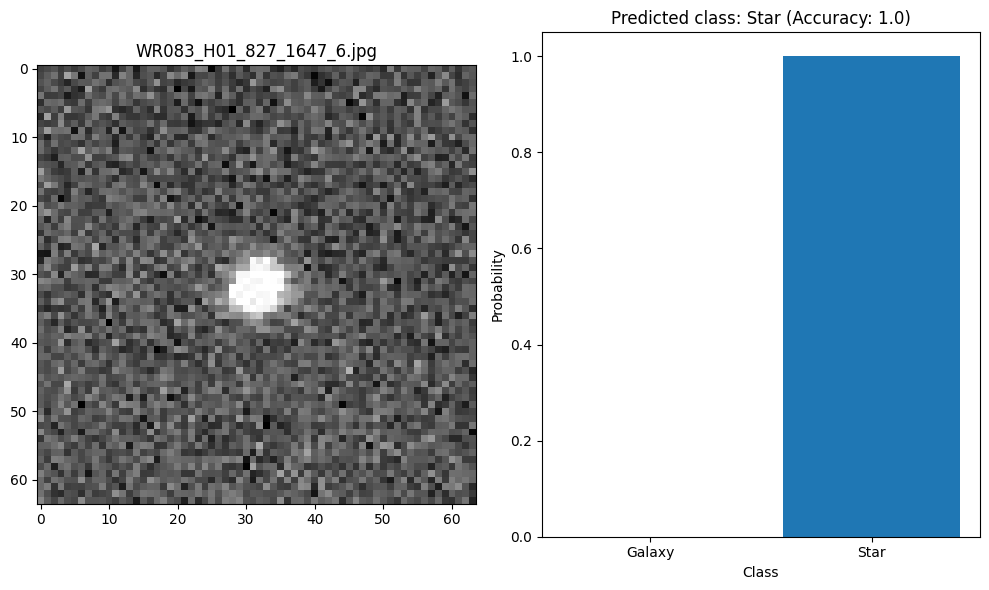

xo-1-R001_1973_389_6.jpg 	 prediction : Star


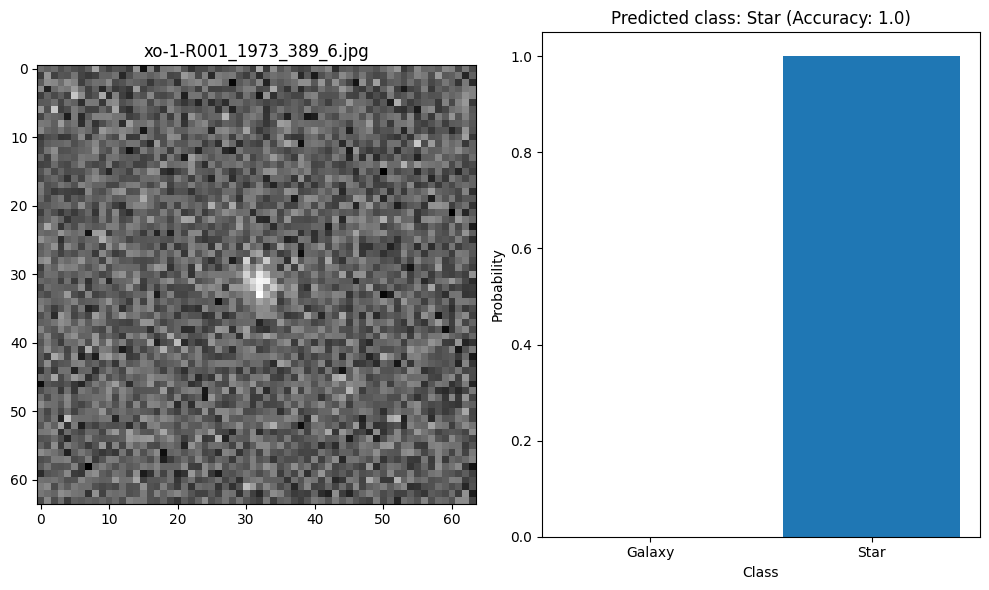

In [24]:
predict_images(
    r"C:\Users\fedba\Downloads\UTS_Machine_Learning\test_dataset", rf)

17


grb0422a_01_68_1020_6.jpg 	 prediction : Star


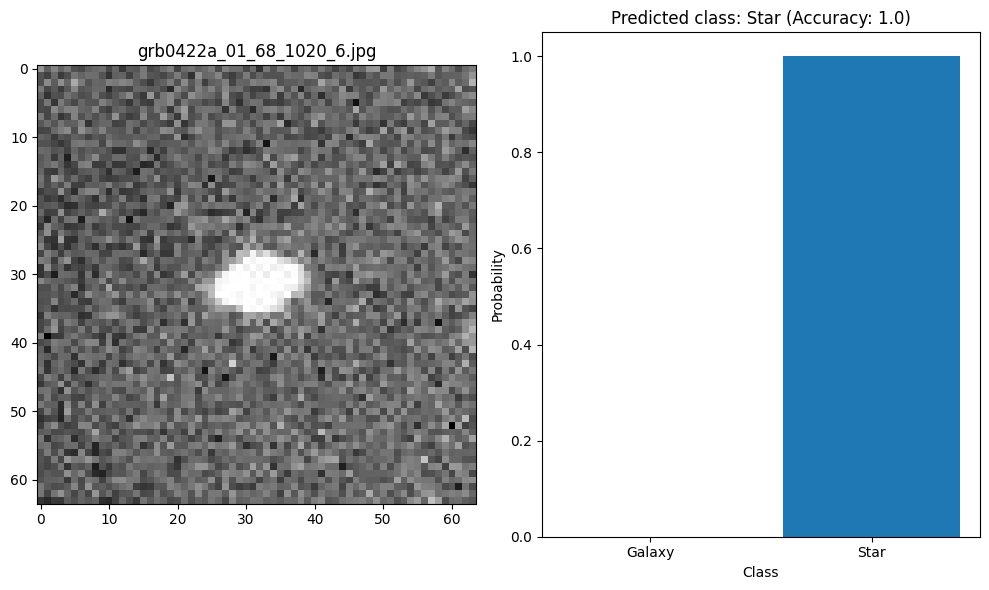

IC745_H01_412_1000_3.jpg 	 prediction : Star


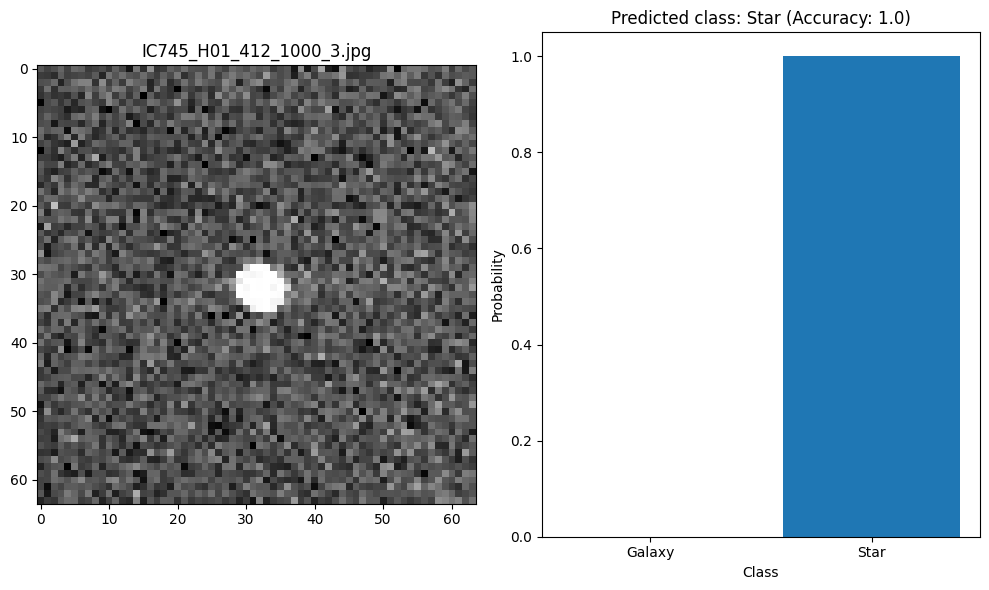

IC745_H01_683_1551_3.jpg 	 prediction : Star


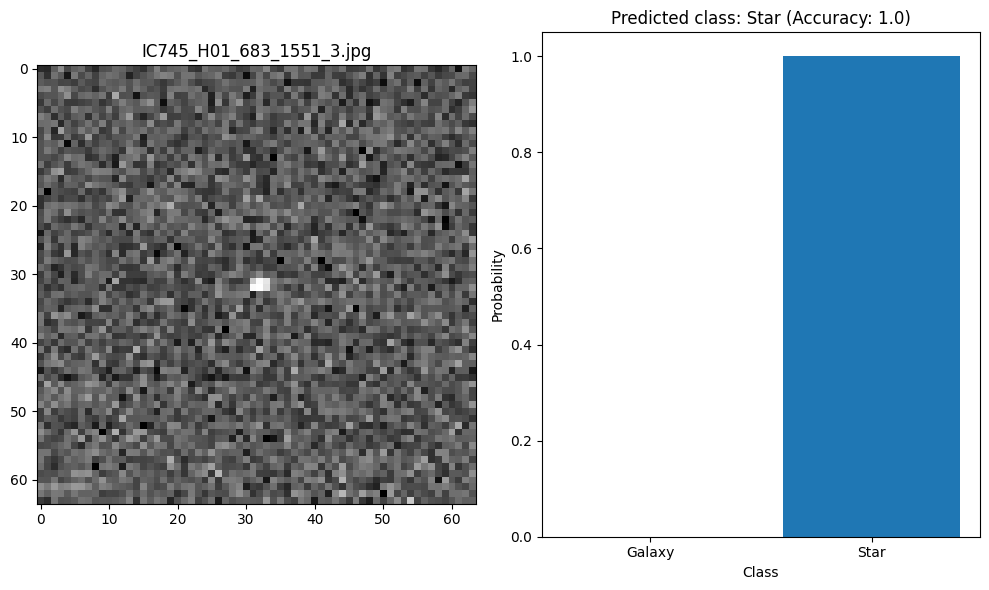

J125219p264053_001_010_1262_1344_6.jpg 	 prediction : Star


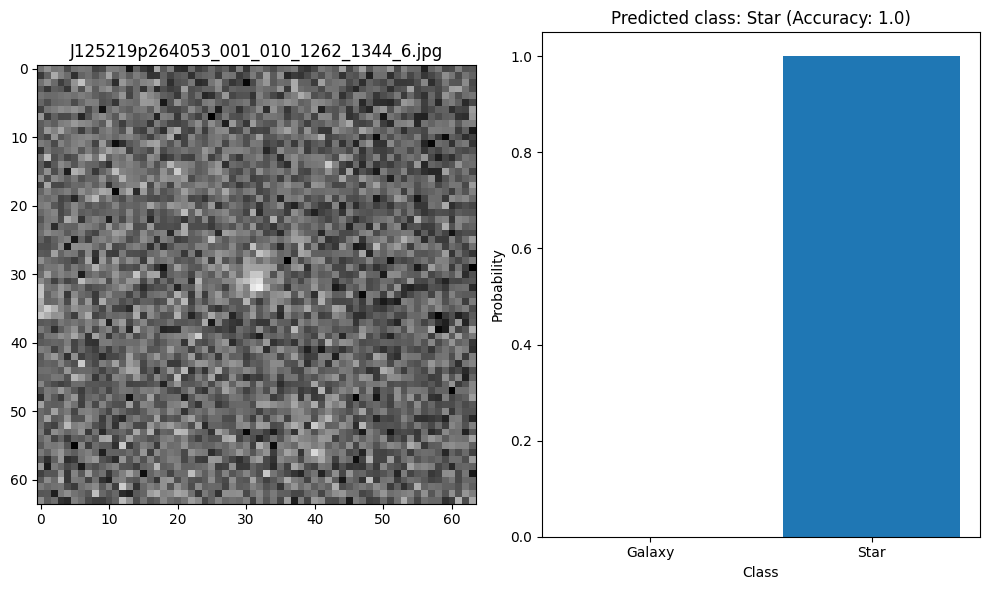

J125219p264053_001_010_1546_524_3.jpg 	 prediction : Star


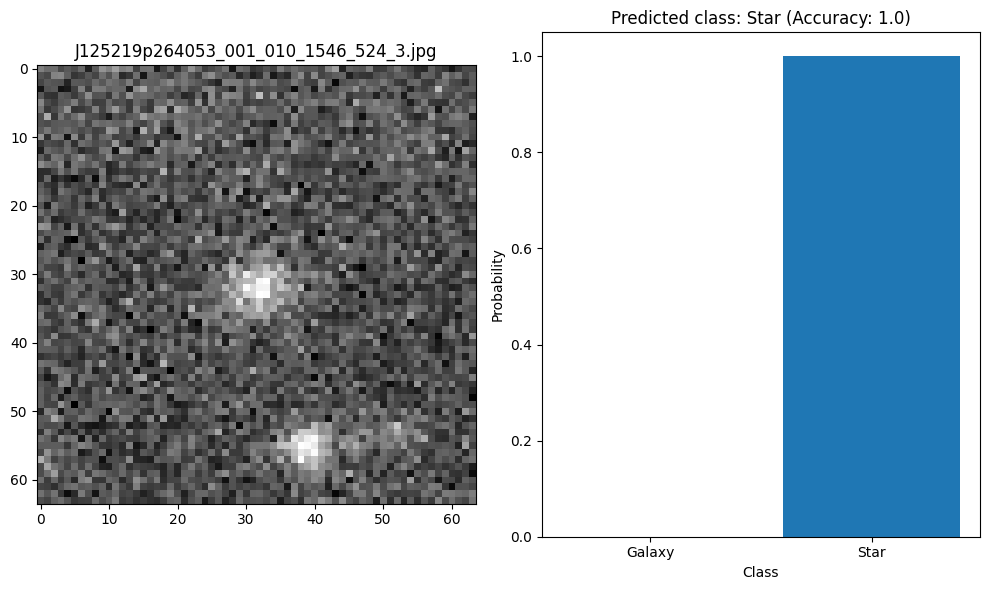

J142943p385931_001_001_159_996_3.jpg 	 prediction : Star


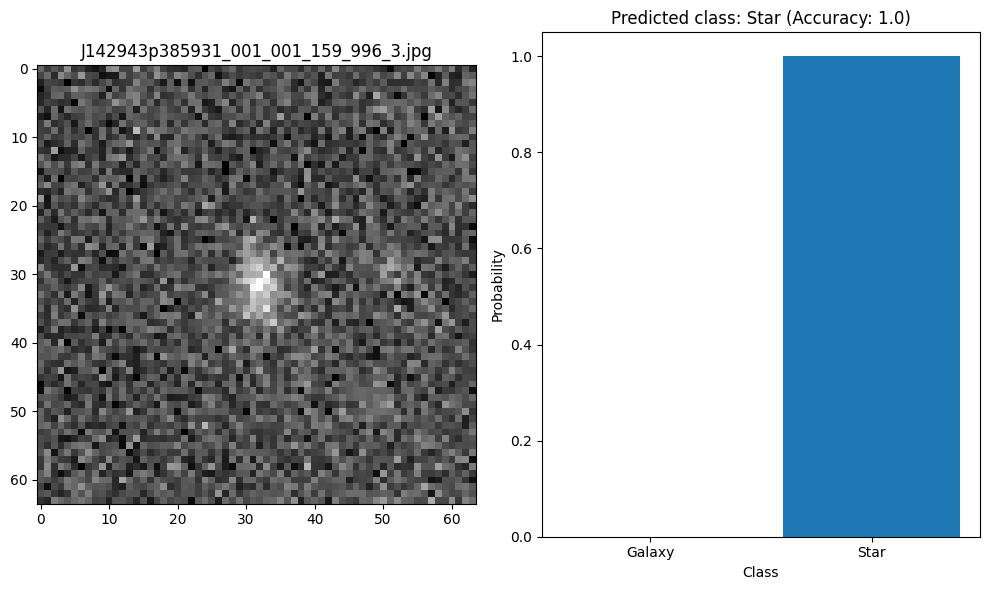

J15050326_01_1367_647_6.jpg 	 prediction : Star


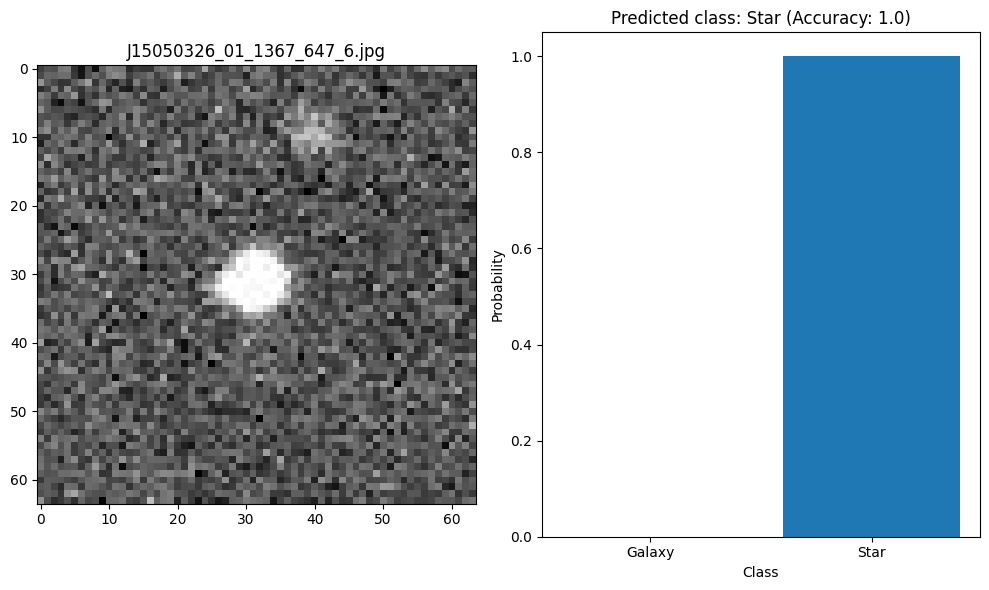

J153044p231014_001_001_1266_534_6.jpg 	 prediction : Star


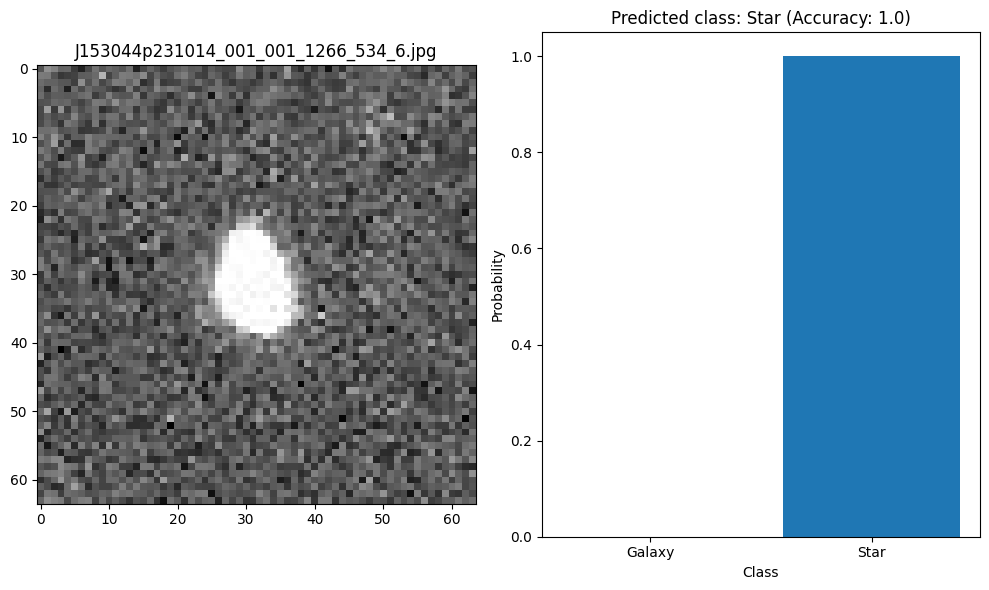

J153044p231014_001_001_625_119_3.jpg 	 prediction : Star


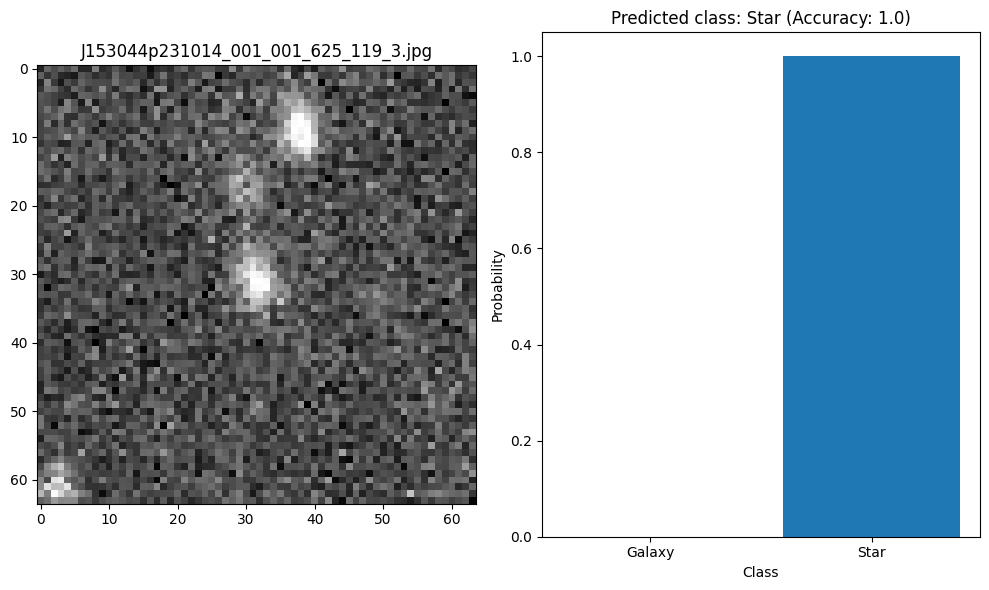

J1530p2310_r_01_92_1222_3.jpg 	 prediction : Star


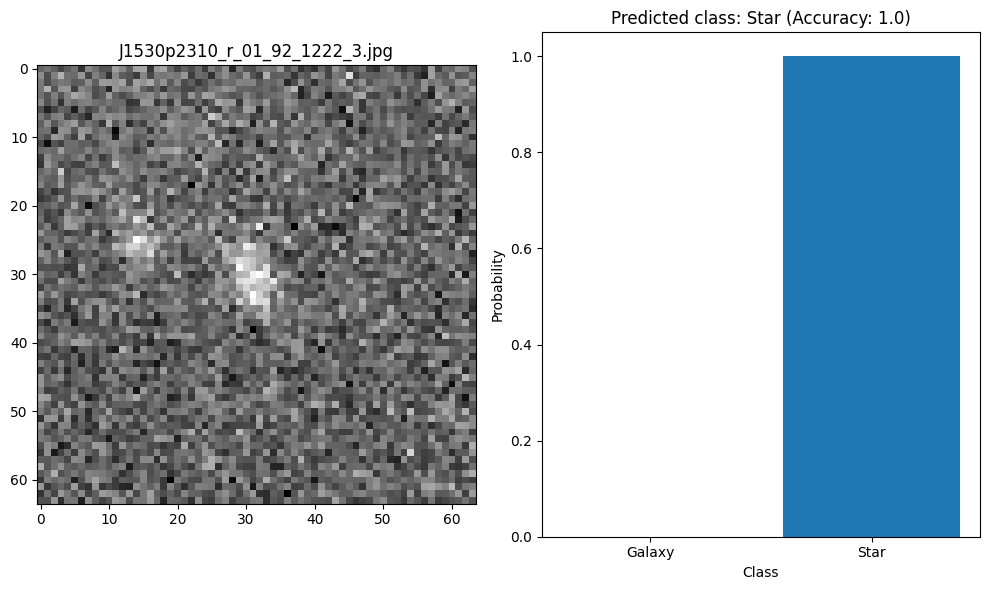

J1603p3002_001_010_676_851_3.jpg 	 prediction : Star


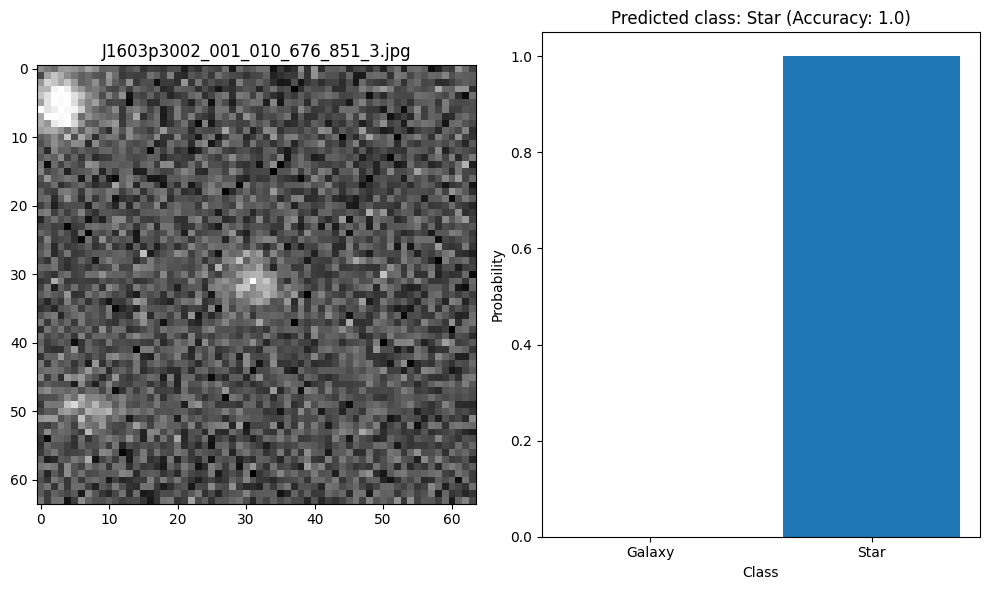

j1612p5118_r_01_1278_1612_6.jpg 	 prediction : Star


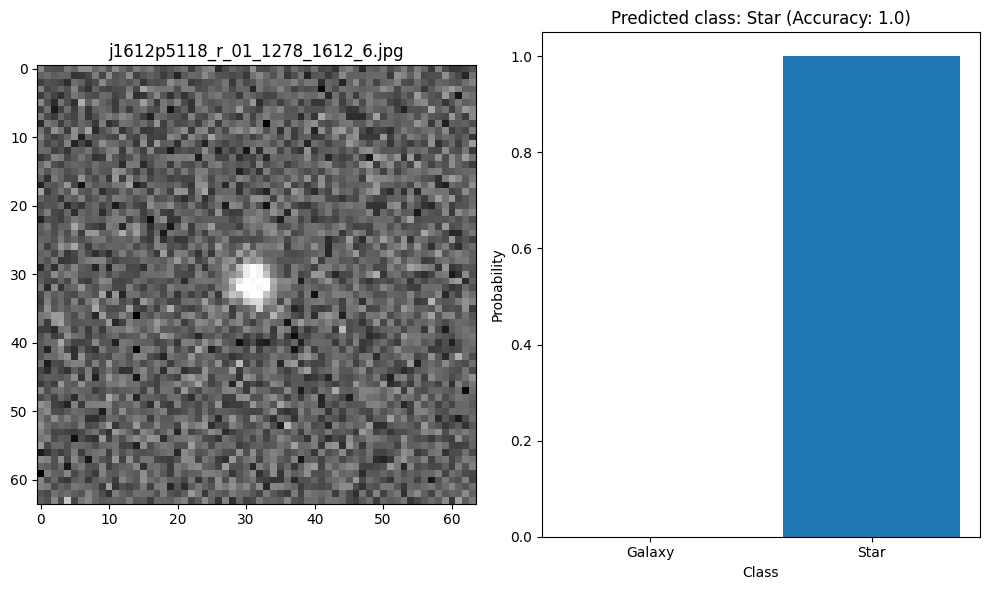

j1612p5118_r_01_1773_916_6.jpg 	 prediction : Star


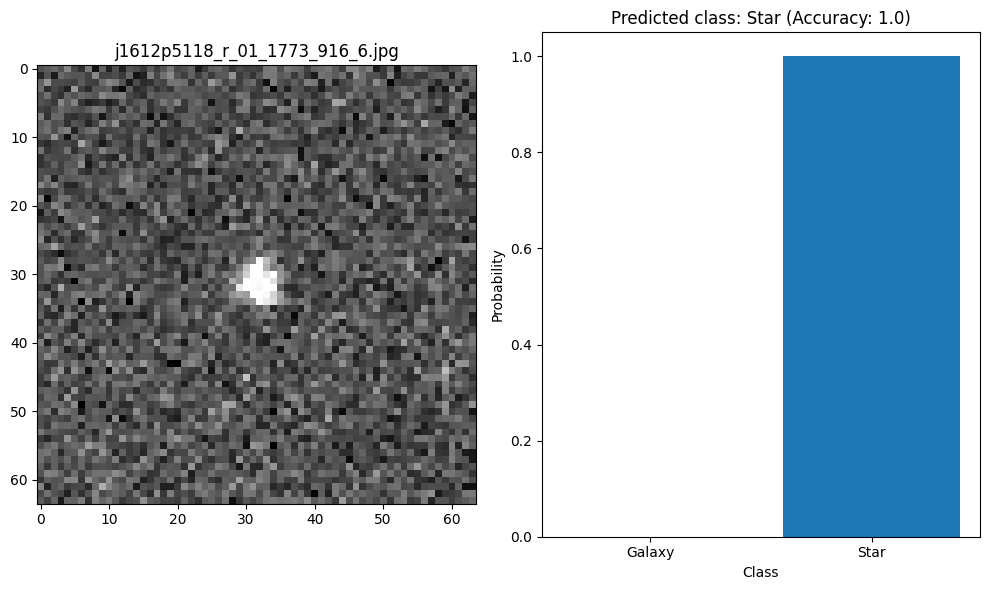

j1612p5118_r_01_951_344_3.jpg 	 prediction : Star


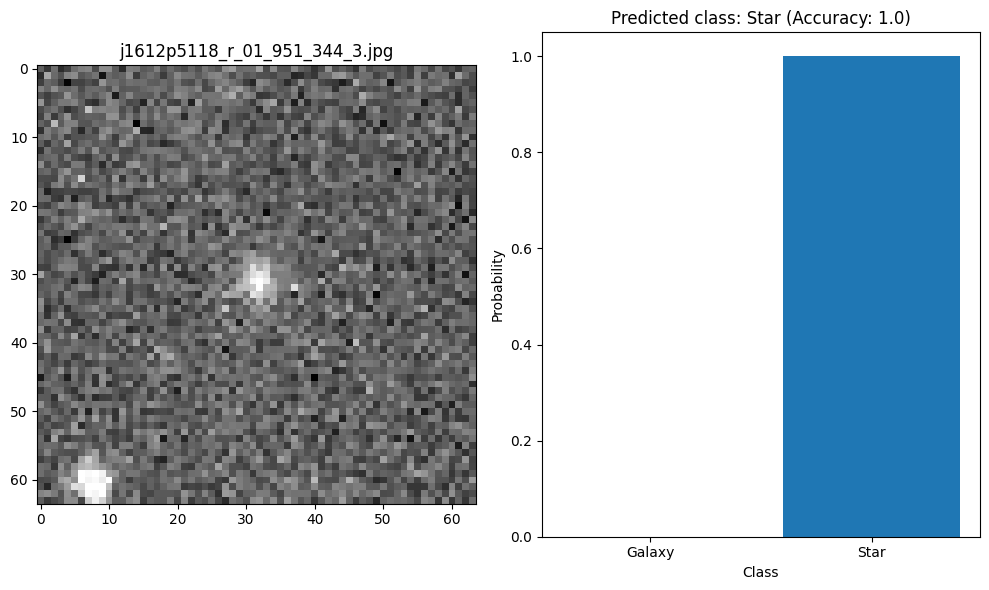

WASP-24_R01_1591_1516_6.jpg 	 prediction : Star


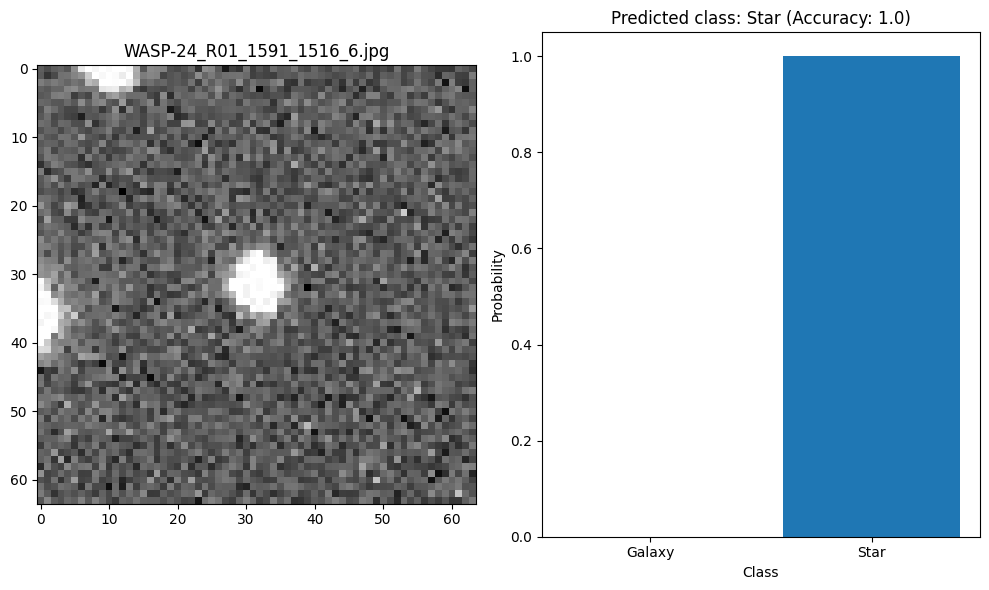

WR083_H01_827_1647_6.jpg 	 prediction : Star


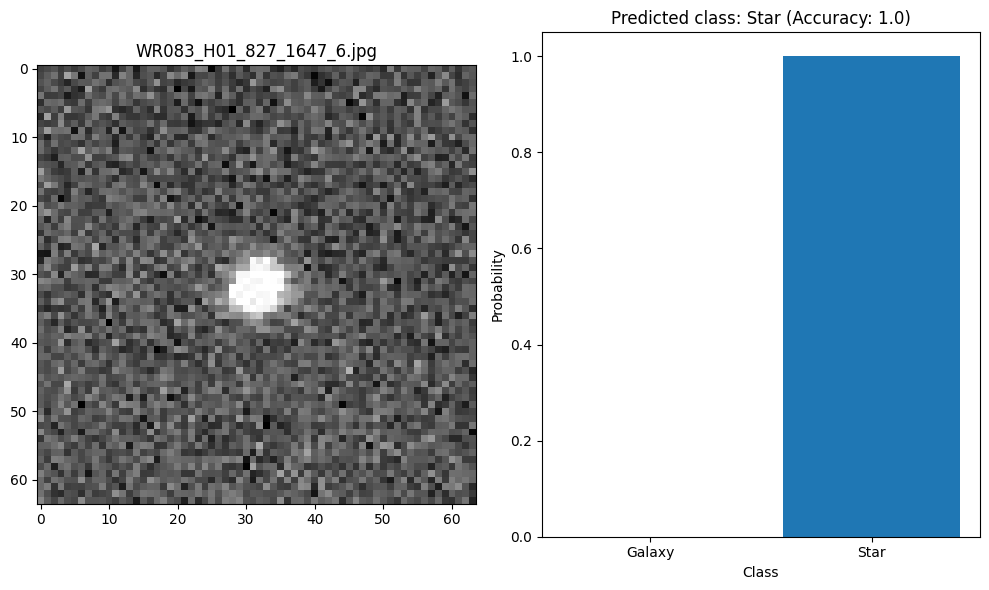

xo-1-R001_1973_389_6.jpg 	 prediction : Star


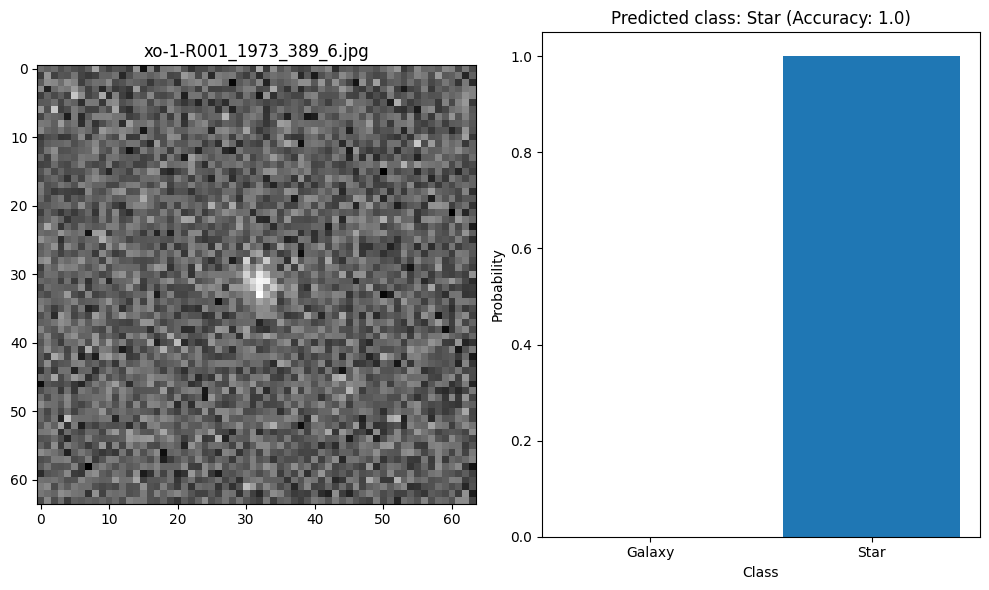

In [25]:
predict_images(
    r"C:\Users\fedba\Downloads\UTS_Machine_Learning\test_dataset", knn)

# Program Tensorflow


In [26]:
batch_size = 3
img_height = 64
img_width = 64
image_size = (64, 64)

In [27]:
image_size = (299, 299)

dataset = image_dataset_from_directory(
    dataset_path,
    image_size=image_size,
)

Found 3986 files belonging to 2 classes.


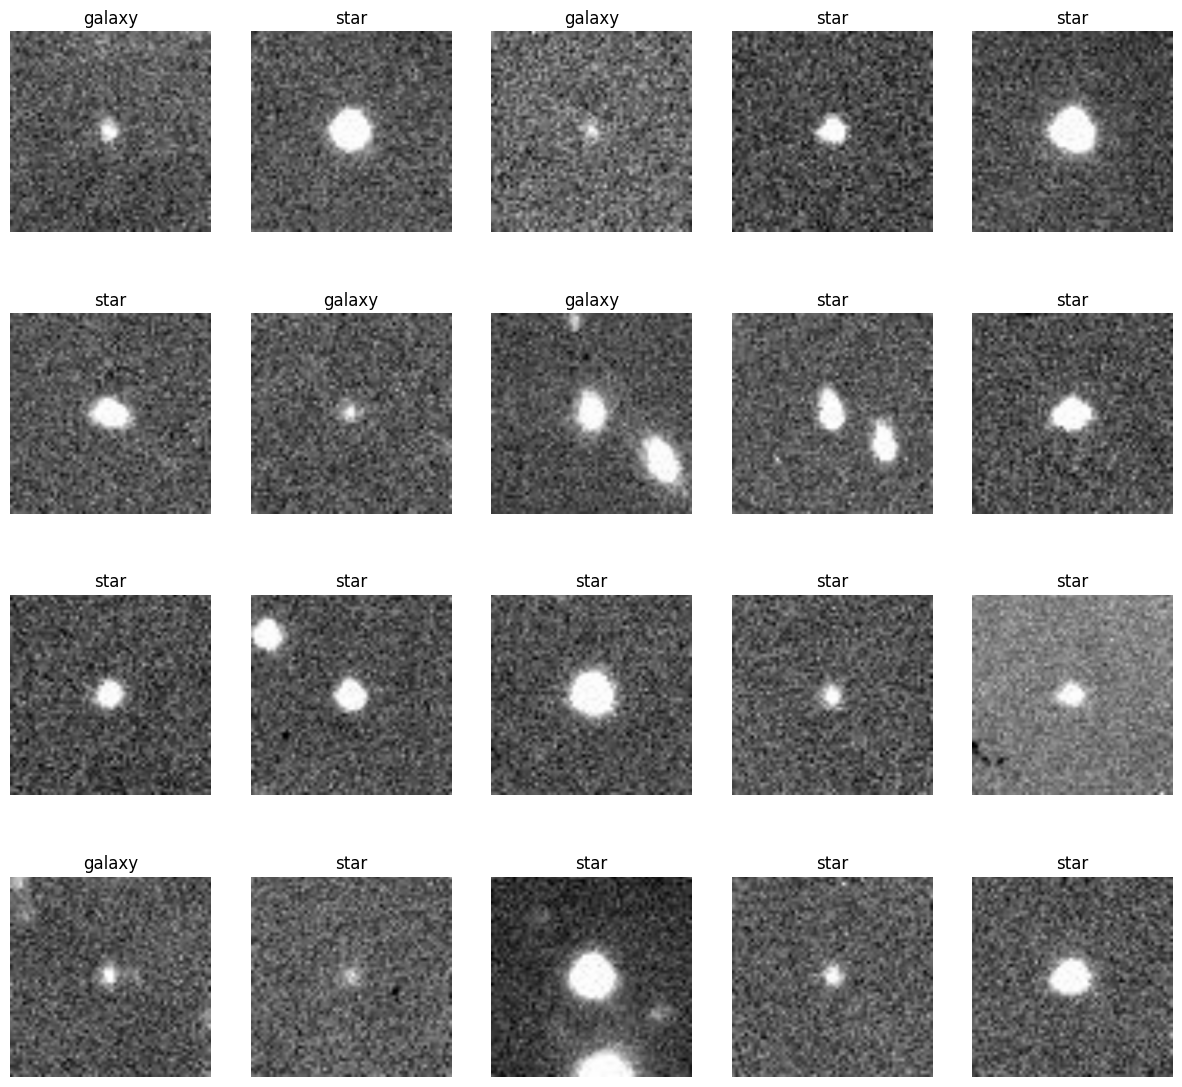

In [28]:
plt.figure(figsize=(15, 25))
class_names = dataset.class_names
for images, labels in dataset.take(1):
    for i in range(20):
        plt.subplot(7, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    seed=1,
    subset="training",
    label_mode="categorical",
    image_size=image_size
)

validation_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    seed=1,
    subset="validation",
    label_mode="categorical",
    image_size=image_size
)

Found 3986 files belonging to 2 classes.
Using 3189 files for training.
Found 3986 files belonging to 2 classes.
Using 797 files for validation.


In [30]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation

In [32]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom((-0.1, 0.1)),
    RandomContrast(0.05),
    RandomTranslation(0.1, 0.1)
])

Membuat model


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [34]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom((-0.1, 0.1)),
    RandomContrast(0.05),
    RandomTranslation(0.1, 0.1)
])

In [35]:
# Modèle CNN
model = Sequential()
model.add(InputLayer(input_shape=(299, 299, 3)))
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(2, activation='softmax', kernel_initializer=tf.keras.initializers.Constant(0.01)))
model.add(Dense(2, activation='softmax'))
# Compilation du modèle
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [1]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5,
    verbose=1)

NameError: name 'model' is not defined

In [ ]:
def plot_scores(train):
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [ ]:
plot_scores(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
test_labels[0]

In [ ]:
import tensorflow as tf
from keras.models import load_model
from matplotlib import pyplot as plt


def predict_image(path):
    # Load model
    model = load_model(path_model)

    # Load image
    img = plt.imread(path)

    # Preprocess image
    img = tf.image.resize(img, (224, 224))
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)

    # Prediksi gambar
    prediction = model(img)

    # Ambil label prediksi
    label = prediction.argmax(axis=1)

    # Tampilkan plot
    plt.imshow(img)
    plt.title(f"{path} - {label}")
    plt.show()


# Path model
path_model = "/path/to/model.h5"

# Path gambar
path_image = "/path/to/image.jpg"

# Prediksi gambar
predict_image(path_image)